# Problem Description

The aim here is to approximate the regression function $f$ which linked two random varibale $Y$ and $X$ in case of endogenuity of the dependent variable $X$.

More precisely, the two random varibales $Y$ and $X$ satisfies

$$
(1)  \qquad\qquad  Y = f(X) + \xi, \qquad \hbox{with $\quad  E(\xi/X) \neq 0$}
$$

where $\xi$ models noise and/or missing variables.

Assume now, that we have a third variable $W$ (called instrument) which is linked with $X$ but such that the conditional expectation $E(\xi/W) = 0$.

Then taking the conditional expectation given $W$ in (1) yields

$$
(2)\qquad\qquad E(Y/W) = E(f(X)/W).
$$

Denoting $f_XW$ and $f_YW$ the joint density of the variables $(X,W)$ and $(Y,W)$, equation (2) can by rewrite as

$$
\int \frac{f_{XW}(x,w)}{f_W(w)} f(x) \mathrm{d}x = \int y \frac{f_{YW}(y,w)}{f_W(w)}  \mathrm{d}y,  \quad w \in \mathrm{supp}(W)
$$

which can be simplified (given the common denominator) as

$$
(E) \qquad\qquad   T f = r, 
$$
where $T: L^2 \to L^2 $ is the linear operator defined by 

$$
(T f )(w) = \int f_{XW}(x,w) f(x) \mathrm{d}x, \quad w \in \mathrm{supp}
$$

and $r$ is defined as 
$$ r(w) = \int y f_{YW}(y,w) \mathrm{d}y $$

$\underline{Remark}$: The equation (E) is usually $\textbf{ill-posed}$, that is the solution $f$ does not depend continuously on the data $r$. Whence the need of a regularization method to recover stable approximate of the regression function $f$.

Due to the ill-posedness of equation $(E)$, we use a regularization method: a variational formulation of mollification.
Roughly speaking, we approximate  $f$ by $f_\beta$ with 

$$
(\mathcal{P_\beta}) \qquad \qquad f_\beta = \mathrm{argmin}_{f \in L^2}  \quad || T f  - r ||^2 + || (I-C_\beta)f ||^2,
$$

where $C_\beta$ is a mollifier (convolution) operator converging pointwise to identity operator as $\beta$ goes to 0.

$\newline$
$\newline$

$$\textbf{ Discretization of operator equation (E)}$$ 

$\newline$

Let $(Y_k,X_k,W_k)_{k=1,...,N}$ be the sample data available. 

Let

$\bullet$ $[a_x,b_x]$ and $[a_w,b_w] $ the support of the variable $X$ and $W$

$\bullet$ $\{\phi_i\}_{i \in \mathbb{N}}$ and $\{\psi_j\}_{j \in \mathbb{N}}$ be orthonormal basis of $L^2([a_x,b_x])$ and $L^2([a_w,b_w])$ respectively.

Let 

$$
(A) \qquad \qquad f \approx \sum_{i=1}^m a_i \phi_i ,\qquad \text{and} \quad r \approx \sum_{j=1}^n b_j \psi_j.
$$

By orthonormality of the basis $\{\psi_j\}_{j \in \mathbb{N}}$, we have

$$
b_j = < r,\psi_j>_{L^2} = \int \int f_{YW}(y,w) y \psi_j(w) \mathrm{d}y\mathrm{d}w = E[Y\psi_j(W)].
$$

Hence using empirical mean approximation of the expectation, we have

$$
\text{For}\,\,\, j=1...,n, \qquad b_j \approx \frac{1}{N} \sum_{k=1}^N Y_k \psi_j(W_k), 
$$

From $(A)$, and the orthonormality of the basis $\{\psi_j\}_{j \in \mathbb{N}}$, we have, we have

$$
\text{For}\,\,\, j=1...,n, \qquad \sum_{i=1}^m a_i < T \phi_i, \psi_j>_{L^2} =  b_j.
$$

But

$$
< T \phi_i, \psi_j>_{L^2} = \int \int f_{XW}(y,w) \phi_i(X) \psi_j(w) \mathrm{d}x\mathrm{d}w = E[\phi_i(X)\psi_j(W)] \approx \frac{1}{N} \sum_{k=1}^N \phi_i(X_k)\psi_j(W_k)
$$

Hence the equation $(E)$ is descretized into the matrix equation

$$  M a = b $$

where $M$ is an $n\times m$ matrix and $b$ is a $n-$ column vector defined respectively by 

$$
\text{For}\,\,\, j=1...,n \quad \text{and} \quad i=1,...,m \qquad  M_{ji} =  \frac{1}{N} \sum_{k=1}^N \phi_i(X_k)\psi_j(W_k) \quad \text{and} \quad b_j = \frac{1}{N} \sum_{k=1}^N Y_k \psi_j(W_k). 
$$

$\textbf{Choice of Basis of Gate function}$

In the sequel, we consider the basis of gate functions. 

Let $h_x = (b_x-a_x)/m$ , $h_w = (b_w-a_w)/n$ and 

$$
x_i = a_x + ih_x, \quad w_j = a_w + j h_w \qquad i=0,...,m  \quad j=0,...,n
$$

More precisely, the basis functions $\phi_i$ and $\psi_j$ are defined by

$$
\phi_i(x) = \frac{1}{\sqrt{h_x}} 1_{[x_{i-1},x_i)}(x), \quad \psi_j(w) = \frac{1}{\sqrt{h_w}} 1_{[w_{j-1},w_j)}(w) ,\qquad i=0,...,m  \quad j=0,...,n
$$

If we choose the following more practical setting

$$
\qquad f \approx \sum_{i=1}^m a_i 1_{[x_{i-1},x_i)} ,\qquad \text{and} \quad r \approx \sum_{j=1}^n b_j 1_{[w_{j-1},w_j)}.
$$

by foloowing the same steps described above, we get

$$
\text{For}\,\,\, j=1...,n \quad \text{and} \quad i=1,...,m \qquad  M_{ji} =  \frac{1}{h_w} \frac{1}{N} \sum_{k=1}^N 1_{[x_{i-1},x_i)}(X_k)1_{[w_{j-1},w_j)}(W_k) \quad \text{and} \quad b_j = \frac{1}{h_w} \frac{1}{N} \sum_{k=1}^N Y_k 1_{[w_{j-1},w_j)}(W_k). 
$$

and in this case, the unknwon coefficients $(a_i)_{i=1,...,m}$ are the coefficients of $f$ in the orthogonal basis $\{1_{[x_{i-1},x_i)} \}_{i=1,...,m}$.

$\textbf{Challenge}$: It may happen that there are some indices $i_0$ such that for all $k=1,...,N$, $\phi_{i_0}(X_k) = 0$.
In this case, for all $j=1,...,n$, $M_{ji_0} = 0$ which means that the column $i_0$ of the matrix $M$ is completely null. As a consequence, the unkwon coefficients $a_{i_0}$ does not appear in the discret system of equation $M a = b$. This needs to be fixed.

$\textbf{Trick bases on interpolation}$: Let $i_0$ such that the column $i_0$ of the matrix $M$ is completely null. For simplicity, assume that the column $i_0 -1$ and $i_0 +1$ are not completely null. Then we can add the unknown coefficient $a_{i_0}$ in the system of equation $M a =b$ as follows

i) by linear interpolation, assume $a_{i_0}  = \frac{1}{2} a_{i_0-1} + \frac{1}{2} a_{i_0 + 1}$

ii) Let $j_{\alpha_0}$ be the first index $j$ such that $M_{j (i_{0}-1)} \neq 0$ and set $ \alpha_0 = M_{j_{\alpha_0} (i_{0}-1)}$

iii) Let $j_{\beta_0}$ be the first index $j \neq j_{\alpha_0}$ such that $M_{j (i_{0}+1)} \neq 0$ and set $ \beta_0 = M_{j_{\beta_0} (i_{0}+1)}$

iv) By mulpliplying the row $j_{\alpha_0}$ (resp. $j_{\beta_0}$) of equation $M a =b$ by $ \frac{1}{2} \frac{1}{\alpha_0}$ (resp. $ \frac{1}{2} \frac{1}{\beta_0}$ and adding the result, we get (after cancelling all $1/2$)

$$
\sum_{i=1}^{i_0-2} \left[  
  \frac{M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{M_{j_{\beta_0} i}}{\beta_0}  
\right] a_i +   \frac{M_{j_{\alpha_0} (i_0+1)}}{\alpha_0} a_{i_0+1} +  a_{i_0-1} +  a_{i_0+ 1} + \frac{M_{j_{\beta_0} (i_0-1)}}{\beta_0} a_{i_0-1} 
+ \sum_{i=i_0+2}^{m} \left[  \frac{M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{M_{j_{\beta_0} i}}{\beta_0}   \right] a_i  = \frac{1}{\alpha_0} b_{j_{\alpha_0}} + \frac{1}{\beta_0} b_{j_{\beta_0}}
$$

v) Now, by taking into account that $a_{i_0}  = \frac{1}{2} a_{i_0-1} + \frac{1}{2} a_{i_0 + 1}$, we get

$$
\sum_{i=1}^{i_0-2} \left[  
  \frac{M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{M_{j_{\beta_0} i}}{\beta_0}  
\right] a_i + \frac{M_{j_{\beta_0} (i_0-1)}}{\beta_0} a_{i_0-1}  +  2 a_{i_0} +   \frac{M_{j_{\alpha_0} (i_0+1)}}{\alpha_0} a_{i_0+1}
+ \sum_{i=i_0+2}^{m} \left[  \frac{M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{M_{j_{\beta_0} i}}{\beta_0}   \right] a_i  = \frac{1}{\alpha_0} b_{j_{\alpha_0}} + \frac{1}{\beta_0} b_{j_{\beta_0}}
$$

vi) By setting

$$ 
\omega_{i} =  
\begin{cases} 
\frac{M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{M_{j_{\beta_0} i}}{\beta_0} & \hbox{if $i \not\in \{i_0-1,i_0,i_0+1\}$} \\
\frac{M_{j_{\beta_0} (i_0-1)}}{\beta_0}  & \hbox{if $i = i_0-1 $} \\
2  & \hbox{if $i = i_0 $} \\
\frac{M_{j_{\alpha_0} (i_0+1)}}{\alpha_0}  & \hbox{if $i = i_0+1 $} 
\end{cases}
$$

we get the equation verified by the unknown coefficient $a_{i_0}$ as

$$
\sum_{i=1}^m \omega_i a_i = \frac{1}{\alpha_0} b_{j_{\alpha_0}} + \frac{1}{\beta_0} b_{j_{\beta_0}}
$$

vii) Hence we add the row $ \Omega_0 =\left[\omega_1 , ..., \omega_m \right]$ and the value $v_0 = \frac{1}{\alpha_0} b_{j_{\alpha_0}} + \frac{1}{\beta_0} b_{j_{\beta_0}}$ to the system $M a = b$ so that the new system has now $n+1$ equations.

$\newline$

In practice, it is possible to have $p$ consecutive indices $i_0, i_0 +1,..., i_0 + p-1$ whose corresponding columns of matrix $M$ are completely zeros. In such a cases, the unkwon coefficients $a_{i_0}, a_{i_0 +1},..., a_{i_0 + p-1}$ are completely in the system of equations. By using the linear interpolation idea described above, we can overcome this problem as follows

i) Let $j_{\alpha_0}$ be the first index $j$ such that $M_{j (i_{0}-1)} \neq 0$ and set $ \alpha_0 = M_{j_{\alpha_0} (i_{0}-1)}$

ii) Let $j_{\beta_0}$ be the first index $j \neq j_{\alpha_0}$ such that $M_{j (i_{0}+p)} \neq 0$ and set $ \beta_0 = M_{j_{\beta_0} (i_{0}+p)}$

For $l= 0,...,p-1$

iii) by linear interpolation, assume $a_{i_0 +l}  = \frac{l+1}{p+1} a_{i_0-1} + \frac{p-l}{p+1} a_{i_0 + p}$

iv) By mulpliplying the row $j_{\alpha_0}$ (resp. $j_{\beta_0}$) of equation $M a =b$ by $ \frac{l+1}{p+1} \frac{1}{\alpha_0}$ (resp. $ \frac{p-l}{p+1} \frac{1}{\beta_0}$ and adding the result, we get (after cancelling all $1/(p+1)$)

$$
\sum_{i=1}^{i_0-2} \left[  
  \frac{(l+1)M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{(p-l)M_{j_{\beta_0} i}}{\beta_0}  
\right] a_i +   (l+1)\frac{M_{j_{\alpha_0} (i_0+1)}}{\alpha_0} a_{i_0+p} +  (l+1)a_{i_0-1} +  (p-l)a_{i_0+ p} + (p-l)\frac{M_{j_{\beta_0} (i_0-1)}}{\beta_0} a_{i_0-1} 
+ \sum_{i=i_0+p+1}^{m} \left[  (l+1)\frac{M_{j_{\alpha_0} i}}{\alpha_0} +  (p-l)\frac{M_{j_{\beta_0} i}}{\beta_0}   \right] a_i  = \frac{l+1}{\alpha_0} b_{j_{\alpha_0}} + \frac{p-l}{\beta_0} b_{j_{\beta_0}}
$$

v) Now, by taking into account that $a_{i_0+l}  = \frac{l+1}{p+1} a_{i_0-1} + \frac{p-l}{p+1} a_{i_0 + p}$, we get

$$
\sum_{i=1}^{i_0-2} \left[  
  \frac{(l+1)M_{j_{\alpha_0} i}}{\alpha_0} +  (p-l)\frac{M_{j_{\beta_0} i}}{\beta_0}  
\right] a_i + (p-l)\frac{M_{j_{\beta_0} (i_0-1)}}{\beta_0} a_{i_0-1}  +  (p+1)a_{i_0+l} +   (l+1)\frac{M_{j_{\alpha_0} (i_0+1)}}{\alpha_0} a_{i_0+p} 
+ \sum_{i=i_0+p+1}^{m} \left[  (l+1)\frac{M_{j_{\alpha_0} i}}{\alpha_0} +  (p-l)\frac{M_{j_{\beta_0} i}}{\beta_0}   \right] a_i  = \frac{l+1}{\alpha_0} b_{j_{\alpha_0}} + \frac{p-l}{\beta_0} b_{j_{\beta_0}}
$$

vi) By setting (without cancellation of $1/(p+1)$)

$$ 
\omega_{i}^l =  
\begin{cases} 
\frac{1}{p+1} \left[ \frac{(l+1)M_{j_{\alpha_0} i}}{\alpha_0} +  \frac{(p-l)M_{j_{\beta_0} i}}{\beta_0}  \right] & \hbox{if $i \in \{1,2,..., i_0-2\}\cup\{i_0+p+1,..., m\}$} \\
\frac{p-l}{p+1} \frac{M_{j_{\beta_0} (i_0-1)}}{\beta_0}  & \hbox{if $i = i_0-1 $} \\
1  & \hbox{if $i = i_0 +l $} \\
\frac{l+1}{p+1} \frac{M_{j_{\alpha_0} (i_0+p)}}{\alpha_0}  & \hbox{if $i = i_0+p $} \\
0 & \hbox{if $i = i_0+k $ with $k \in \{0,...,p-1\}$ and $k \neq l$} 
\end{cases}
$$
and 

$$
v_{i_0}^l = \frac{1}{p+1} \left[\frac{(l+1)}{\alpha_0} b_{j_{\alpha_0}} +  \frac{(p-l)}{\beta_0}b_{j_{\beta_0}} \right]
$$

we get the equation verified by the unknown coefficient $a_{i_0 + l}$ as

$$
\sum_{i=1}^m \omega_{i}^l a_i = v_{i_0}^l
$$

Hence for $l=0,...,p-1$ we add the rows $ \Omega^l =\left[\omega_1^l , ..., \omega_m^l \right]$ and the value $v_{i_0}^l$ to the system $M a = b$ so that the new system has now $n+p$ equations.


In case there are several block columns of the matrix $M$ which are competely null, we just repeat the above procedure for each couple $(i_0,p)$.

$\textbf{Import of Libraries}$

In [47]:
import numpy as np
import scipy.linalg as sc_la
from numpy.linalg import norm
from scipy.sparse import linalg as spla
import ipywidgets as widgets

$\textbf{Gate function }$

In [48]:
Gate_func = lambda x,a,b : (x>=a)*(x<b)*1

$\textbf{Function to correct zeros colums by interpolation trick}$

In [49]:
def cor_zeros_col_by_interp(M,b,List_i_0,List_p):
    """
    This function corrects the zeros columns in the Matrix M using interpolation trick
    described above 
    
    
    Inputs description:
    M: Matrix having some zeros columns
    b: right hand side of the matrix equation corresponding to matrix M
    List_i_0  : list of indices i_ of the zeros columns block of Matrix M
    List_p: List of number of columns of each zeros columns block of Matrix M
    
    Outputs:
    
    new_M : new matrix M being the replacement of matrix M
    new_r : new right hand side corresponding to matrix new_M
    
    """
    
    [n,m] = np.shape(M)
    
    nb_i_0   = len(List_i_0)
    
    ## initialization of the new matrix and right hand side
    new_M = M.copy()
    new_b = b.copy()
    
    for ll in range(nb_i_0):
        
        i_0  = List_i_0[ll]
        p    = List_p[ll]
        
        
        ## Computation of indices j_alpha_0 and j_beta_0 and coefficients alpha_0 and beta_0
        ind_ = 0
        while ind_ < n and M[ind_,i_0-1] == 0 : 
            ind_ +=1
            
        j_alpha_0 = ind_
        alpha_0   = M[j_alpha_0,i_0-1]
        
        ind_ = 0
        while ind_ < n and (ind_ == j_alpha_0 or M[ind_,i_0+p] ==0 ): 
            ind_ +=1
            
        j_beta_0 = ind_       
        beta_0   = M[j_beta_0,i_0+p]
        
        for l in range(p):
            v_i0_l = (1/(p+1))*( (l+1)*b[j_alpha_0]/alpha_0 + (p-l)*b[j_beta_0]/beta_0 ) 
            
            Omega_l = np.zeros((1,m))
            l1 = np.arange(0,i_0-2)
            l2 = np.arange(i_0+p+1,m)
            list_ = np.concatenate((l1, l2), axis=None)
            for i in list_:
                Omega_l[0,i] =  (1/(p+1))*( (l+1)*M[j_alpha_0,i]/alpha_0 + (p-l)*M[j_beta_0,i]/beta_0 )
            
            Omega_l[0, i_0 + l] = 1
            Omega_l[0, i_0 - 1] = ((p-l)/(p+1))*( M[j_beta_0,i_0-1]/beta_0)
            Omega_l[0, i_0 + p] = ((l+1)/(p+1))*(M[j_alpha_0,i_0+p]/alpha_0)
            
            new_M = np.concatenate((new_M,Omega_l))
            new_b = np.concatenate((new_b,[v_i0_l]))
    
    return new_M,new_b

# ## Example for testing 
# zero_ = np.zeros(6)
# M = np.random.randint(1,10, size=(6, 6))
# M[:,1] = zero_
# M[:,2] = zero_
# M[:,4] = zero_

# List_i_0 = [1,4]
# List_p   = [2,1]

# x_dag = np.array([3,0,0,6, 0,8])  # minimum norm solution
# b     = M @ x_dag

# best_x = x_dag.copy()
# best_x[1] = (1/3)*best_x[0]+ (2/3)*best_x[3]
# best_x[2] = (2/3)*best_x[0]+ (1/3)*best_x[3]
# best_x[4] = (1/2)*best_x[3]+ (1/2)*best_x[5]

# print(" \n x_dag = ")
# print(x_dag)

# print(" \n x_inter = ")
# print(best_x)

# [new_M,new_b] = cor_zeros_col_by_interp(M,b,List_i_0,List_p)
# new_M_t  = new_M.T
# new_M_NE = new_M_t @ new_M
# new_b_NE = new_M_t @ new_b

# [n_,m_] = np.shape(new_M)
# print("Shape New M = (%d,%d) \n" %(n_,m_))
# print(" %d rows added . \n" %  (n_ -6))

# print("\n New_M * x_dag - New_b  = ")
# print( np.dot(new_M,x_dag) - new_b)

# print("\n || New_M * x_inter - New_b || = %g" % round(norm(np.dot(new_M,best_x) - new_b) ))

# print("\n new_M^*new_M  x_dag - new_M^*b = ")
# print(np.dot(new_M_NE,x_dag) - new_b_NE)

# print("\n || (new_M^*new_M ) x_inter - new_M^*b || =  %g " % round(norm(np.dot(new_M_NE,best_x) - new_b_NE)))

# print("\n [new_M^*new_M ]^{-1} new_M^*b - x_inter = %g " % round(norm(sc_la.lstsq(new_M,new_b, lapack_driver="gelsd")[0] -  best_x )))

# print("\n || [M^*M ]^{-1} M^*b - x_dag || = %g  " % round(norm (sc_la.lstsq(M, b, lapack_driver="gelsd")[0] -  x_dag  ) ))

$\textbf{Discretization of Equation}$ (E)

In [50]:
def Discretization_Gate_function(Y,X,W,m,n,kk_min_X = 5,kk_max_X = 5,kk_min_W = 5,kk_max_W =5,print_msg = True):
    """
    This function discretizes the equation E(Y/W)  = E(f(X)/W)
    into a matrix equation by using Galerkin method
    projection unto basis of Gate functions.
    
    Inputs Descrition
    
    (Y,X,W) are real sample data of same length N
    
    m : number of basis gate functions to approximate the regression functon f
    n : number of basis gate functions to approximate the right hand side r
    kk_min_X (>= 1) : index of order of the min to choose the support of X
    kk_max_X (>= 1) : index of order of the max to choose the support of X
    kk_min_W (>= 1) : index of order of the min to choose the support of W
    kk_max_W (>= 1) : index of order of the max to choose the support of W
    
    Remark: It is desirable that n >> m so as the avoid under-determined system 
    of equation
    
    Outputs :
    
    M : matrix M representing the discretization of operator T
    b : right hand side of the discrete equation
    x_node : discretization nodes x_i, i=0,...,m for defining the gate functions to approximate 
             the regression function f
    
    
    Walter Simo, April 2022
    
    """
    
    if len(Y) != len(X) or len(X) != len(W):
        print(" The Sample Data Y,X and W should have the same length")
        return "Error"
    
    N = len(Y)
        
    eps = 1e-6
    sort_X = np.sort(X)
    sort_W = np.sort(W)
    
    # support [a_x,b_x] of the data X and [a_w,b_w] of W  to consider for regression
    # take a_x as the kk_min_X_-th smallest element in X and b_x the kk_max_X-th largest element of X
    # take a_w as the kk_min_W-th smallest element in W and b_W the kk_max_W-th largest element of W
    # the addition of eps aims at making sure that the last row and column of M is not zeros 
    [a_x,b_x] = [sort_X[kk_min_X-1] , sort_X[-kk_max_X] + eps]
    [a_w,b_w] = [sort_W[kk_min_W-1] , sort_W[-kk_max_W] + eps]
    
    # stepsize along x and w
    h_x = (b_x - a_x)/m
    h_w = (b_w - a_w)/n
    
    if print_msg:
        print(" Considered support of X = [%2.3g, %2.3g] \n "%(a_x,b_x))
        print(" Considered support of W = [%2.3g, %2.3g] \n "%(a_w,b_w))
        
    # node x_i and w_j along X and W of length m+1 and n+1 respectively    
    x_node = np.linspace(a_x,b_x,m+1)
    w_node = np.linspace(a_w,b_w,n+1)
    
    b = np.zeros(n)
    M = np.zeros((n,m))
    
    
    # List of indices i_ where the gate function phi_i where no sample data X_k falls
    # and corresponding number of adjacent such gate function
    
    List_i_   =  []
    List_p_i_ =  []
    
    L_i_null = []
    
    for j in range(n):
        b[j] = (1/N)*sum( Y*Gate_func(W,w_node[j],w_node[j+1]) )
        
    for i in range(m):
        phi_i_X = Gate_func(X,x_node[i],x_node[i+1])
        if sum(phi_i_X) == 0:
            L_i_null.append(i)
            if i==0 :
                print("WARNING: the first column is zeros")
            if i==m-1:
                print("WARNING: the last column is zeros")
        for j in range(n):
            psi_j_W = Gate_func(W,w_node[j],w_node[j+1]) 
            
            M[j,i] = (1/N)*sum( phi_i_X*psi_j_W)
            
            
                
    ## scaling so that b_j and a_i are directly the coefficients into un-normalized gate function         
    b = b/h_w
    M = M/h_w
    
    Nb_i_null =  len(L_i_null)
    
    if Nb_i_null>0:

        if print_msg:
            print("The original Matrix M has  %d zeros columns " %Nb_i_null )
            print("  whose index are ",L_i_null)
        if Nb_i_null ==1:
            List_i_   = L_i_null
            List_p_i_ = [1]
        else:
            ind = 0
            while ind < Nb_i_null:
                List_i_.append(L_i_null[ind])
                List_p_i_.append(1)
                
                if ind < Nb_i_null - 1:
                    while ind < Nb_i_null - 1 and L_i_null[ind+1] - L_i_null[ind] == 1 :
                        List_p_i_[-1] += 1
                        ind           += 1
                    ind += 1
                else:
                    break
         
        if print_msg:
            print(" Correction of zeros column with interpolation trick ... \n")
        [new_M,new_b] = cor_zeros_col_by_interp(M,b,List_i_,List_p_i_)
        return new_M,new_b,x_node
    else:
        if print_msg:
            print("Best case: The original Matrix M has no zeros column :) \n")
        return M,b,x_node

# Convolution Operator $C_\beta$


This Module contains the function $\texttt{Mat_Conv_1d}$ which is a discretization of the continuous convolution operator by the kernel $$ \phi_\beta(x) = \frac{1}{\beta} \phi\left(\frac{x}{\beta}\right)$$  with parameter $\beta$ playing the role of the level of resolution. 

More precisely, given a function $f$ defined on an interval $[a,b]$ (for 1-dimensional case), discretized as vector

$$
Y_j = f(x_j), \quad j= 0,...,n_x-1 
$$

and a resolution level beta, the function Mat_Conv_1d returns a matrix C_beta such that 

$$Y_\beta = C_\beta Y$$ approximates the discretization of the continuous function $f_\beta = f\star\phi_\beta$

In this module, $\phi$ is a function whose cumulative density $\int_{-\infty}^x \phi(t) \mathrm{d}t$ is cheap to compute. 
Here we consider 4 cases for the kernel function $\phi$:

a) the Gaussian kernel  $$ \phi(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{\vert x \vert ^2}{2}}.$$
b) the Cauchy kernel $$ \phi(x) = \frac{1}{\pi(1 + x^2)} ,$$
c) the Laplace kernel $$ \phi(x) = \frac{1}{2 b} e^{-\frac{|x|}{b}}, \quad \text{with} \quad b =1/\sqrt{2}, $$
d) the Logistic kernel $$ \phi(x) = \frac{e^{-x/s}}{s ( 1 + e^{-x/s})^2} \quad  \text{with} \quad s = \frac{\sqrt{3}}{\pi}, $$


For the Laplace kernel and Logistic kernel, the parameter $b$ and $s$ are chosen such that the variance of the disribution is $1$.

N.B.: Notice that the logistic kernel is not symmetric on the contrary to the three other kernel.


In [51]:
import scipy.stats as stat
from scipy.sparse import csr_matrix,coo_matrix
import scipy.sparse as sparse

def Mat_Conv_1d(n,h,beta_,kernel = 'gaussian'):
    """
    This function computes a matrix C_beta n x n for galerkin discretization
    In this function, we assume that the convol kernel is either the gaussian, 
    the     Cauchy, Laplace or Logistic density distribution. In each case, 
    we use the cumulative density function of the normale gaussian is used 
    for approximating the convolution with box functions.
    
   The input kernel is either 'gaussian','cauchy','laplace' or 'logistic'.
    
    Walter SIMO, Nov 5, 2021
    """

    U = np.zeros((n,n))

    tau_beta = h/beta_

    tt = np.arange(0,n+1)-1/2
    vec_dis= tt*tau_beta
    
    # cumulative density function of vec_dis according to the choice of the kernel
    if kernel == 'gaussian':
        cdf_vec_dis = stat.norm.cdf(vec_dis,loc = 0,scale = 1)
    elif kernel == 'cauchy':
        cdf_vec_dis = stat.cauchy.cdf(vec_dis,loc = 0,scale = 1)
    elif kernel == 'laplace':
        cdf_vec_dis = stat.laplace.cdf(vec_dis,loc = 0,scale = 1/np.sqrt(2))
    elif kernel == 'logistic':
        cdf_vec_dis = stat.logistic.cdf(vec_dis,loc =0,scale = np.sqrt(3)/np.pi)
    else:
        print("ERROR Mat_Conv_1d: kernel should be one of the following string: 'gaussian','cauchy','laplace','logistic' !!! ")
        
    vec_theta = [0]*n

    for k in range(n):
        vec_theta[k]= cdf_vec_dis[k+1] - cdf_vec_dis[k]

    
    diag_elt = vec_theta[0]

    for  i in range(n):
        for j in range(i+1,n):
            U[i,j] = vec_theta[j-i]
            
    C = U + U.T + np.diag([diag_elt]*n)
    return C

def min_beta_C_beta_1d(h,kernel, seuil=1e-6):
    """
    This function computes the minimum value of beta such that
    || I - C_beta ||_inf < seuil
    
    The method is based on the following remark:
    By definition of the matrix C_beta, the maximum non-diagonal element 
    is on the 2 diagonal 
    || I - C_beta ||_inf = cdf((3/2)(h/beta)) - cdf((1/2)(h/beta))
    
    Walter Simo
     """
    
    tau = 1
    Q = 1.1
    if kernel == 'gaussian':
        
        while stat.norm.cdf(3*tau,loc = 0,scale = 1) - stat.norm.cdf(tau,loc = 0,scale = 1) > 0.1*seuil:
            tau = Q*tau
    elif kernel == 'cauchy':
        while stat.cauchy.cdf(3*tau,loc = 0,scale = 1) - stat.cauchy.cdf(tau,loc = 0,scale = 1) > 0.1*seuil:
            tau = Q*tau
    elif kernel == 'laplace':
        while stat.laplace.cdf(3*tau,loc = 0,scale = 1/np.sqrt(2)) - stat.laplace.cdf(tau,loc = 0,scale = 1/np.sqrt(2)) > 0.1*seuil:
            tau = Q*tau
    elif kernel == 'logistic':
        while stat.logistic.cdf(3*tau,loc = 0,scale = np.sqrt(3)/np.pi) - stat.logistic.cdf(tau,loc = 0,scale = np.sqrt(3)/np.pi) > 0.1*seuil:
            tau = Q*tau
    else:
        print("ERROR : kernel should be one of the following string: 'gaussian','cauchy','laplace','logistic' !!! ")
    
    beta_min = h/(2*tau)
    return beta_min

# # Test
# n=200
# h=0.05
# kernel = 'gaussian'
# I = np.eye(n)
# beta_min =  min_beta_C_beta_1d(h,kernel,1e-5)
# print(" beta_min  = % 2.5E \n " % beta_min)
# print(" || I - C_beta ||_inf = ",norm( Mat_Conv_1d(n,h,beta_min,kernel) - I,ord  = np.inf) )
# print(" || I - C_beta ||_fro = ",norm( Mat_Conv_1d(n,h,beta_min,kernel) - I,ord  = 'fro') )

# n=200
# h=0.01
# kernel = 'cauchy'
# I = np.eye(n)
# beta_min =  min_beta_C_beta_1d(h,kernel,1e-5)
# print(" beta_min  = % 2.5E \n " % beta_min)
# print(" || I - C_beta ||_inf = ",norm( Mat_Conv_1d(n,h,beta_min,kernel) - I,ord  = np.inf) )
# print(" || I - C_beta ||_fro = ",norm( Mat_Conv_1d(n,h,beta_min,kernel) - I,ord  = 'fro') )

# n=150
# h=0.02
# kernel = 'laplace'
# I = np.eye(n)
# beta_min =  min_beta_C_beta_1d(h,kernel,1e-5)
# print(" beta_min  = % 2.5E \n " % beta_min)
# print(" || I - C_beta ||_inf = ",norm( Mat_Conv_1d(n,h,beta_min,kernel) - I,ord  = np.inf) )
# print(" || I - C_beta ||_fro = ",norm( Mat_Conv_1d(n,h,beta_min,kernel) - I,ord  = 'fro') )

$\textbf{Regularization by Mollification}$

In [52]:
def regul_npir_by_mollif_single_beta(Y,X,W,m,n,beta_,kk_min_X = 5,kk_max_X = 5,kk_min_W = 5,kk_max_W =5,kernel = 'gaussian',save_output = False,filename = "Trial.txt",print_msg=True):
    """
    This function computes an approximation f_beta of the regression f satisfying
    (1) Y = f(X) + Error 
    via the equation E(Y/W)  = E(f(X)/W) where W is an instrument.
    
    From the equation (E) (see Problem Description), the approximation f_beta is computed 
    as the solution of the optimization problem $P_\beta$ via the First order optimality 
    condition
    
    [M^*M + (I -C_\beta)^*(I -C_\beta)] x_\beta = M^* b
    
    where x_\beta are the coefficients of the function f_\beta in the basis of gate function
    {\phi_i}{i=1,...,m}
    
    Inputs Description:
    
    (Y,X,W) : sample data
    
    m : number of basis gate functions to approximate the regression functon f
    n : number of basis gate functions to approximate the right hand side r
    beta_  : positive regularization parameter
    
    kk_min_X (>= 1) : index of order of the min to choose the support of X
    kk_max_X (>= 1) : index of order of the max to choose the support of X
    kk_min_W (>= 1) : index of order of the min to choose the support of W
    kk_max_W (>= 1) : index of order of the max to choose the support of W
    
    
    kernel : convolution kernel (either 'gaussian','cauchy','laplace' or 'logistic'.)
    
    save_output: Boolean if True we save the solution the results into textfile

    Remark: It is desirable that n >> m so as the avoid under-determined system 
    of equation
    
    Outputs :
    
    f_x_beta : image of vector x_ by the approximation f_\beta of the regression function f
    x_       : abcissa along x
    
    Walter SIMO, April, 2022
    """
    if print_msg:
        print(" I - Discretization of the problem ... ")
    
    [M,rhs_b,x_node] = Discretization_Gate_function(Y,X,W,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
    
    # number of gate function to approximate the regression function f
    
    m = len(x_node) - 1               
    h_x = x_node[1] - x_node[0]
    a_x = x_node[0]
    b_x = x_node[-1]

    if print_msg:
        print(" II - Regularization process ... ")
    
    M_T     =  M.T
    M_NE    =  M_T @ M
    b_NE    =  M_T @ rhs_b

    C_beta = Mat_Conv_1d(m,h_x,beta_,kernel)
    I_ = np.eye(m)
    
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") # sc_la.solve(MM_C_beta_NE,b_NE) 
    
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
    if print_msg:
        if rank ==m:
            print(" The Matrix of the F.O.O.C is non singular :) \n ")
        else:
            print(" The Matrix of the F.O.O.C is singular x) \n ")

        if residual < 1e-10:
            print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E  \n" % residual)
        else:
            print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
    x_ = np.zeros(m)
    for k in range(m):
        x_[k] = (x_node[k] + x_node[k+1])/2

    f_x_beta = coef_x_beta
    
    if save_output:
        data_x__f_x_beta = np.array([x_,f_x_beta]).T
        write_into_file(data_x__f_x_beta,'data_x__f_x_beta__'+filename)
        
    return f_x_beta,x_

$\textbf{Application with data-driven parameter selection rule}$

$\textbf{a) Objective function of the data driven parameter choice rule}$

In [53]:
def quant_high_freq_in_sign(data_,p=3):
    """
    This function quantifies the high frequency in the signal data_
    This is done by computing the norm of the difference between 
    the signal data_ and its low pass filtered version low_pass_data_
    
    the kernel of the low pass filter we use is [1/p,..., 1/p]
    """
    n = len(data_)
    
    low_pass_data_ = np.zeros(n)
    
    # cast p into odd number
    if p%2 == 0:
        p = p+1
        
    kernel_low_pass_fil = (1/p)*np.ones(p)
    
    nn = p//2
    for k in range(nn,n-nn):
        low_pass_data_[k] = sum(kernel_low_pass_fil*data_[k-nn:k+nn+1])

    for k in range(nn):
        low_pass_data_[k] = data_[k]
    for k in range(n-nn,n):
        low_pass_data_[k] = data_[k]
        
    return norm(low_pass_data_ - data_)

def kill_high_freq_in_sign(data_,p=5):
    """
    This function kills all the high frequency in the signal data_
    This is done by computing the difference between the signal data_ 
    and its low pass filtered version low_pass_data_
    
    the kernel of the low pass filter we use is [1/p,..., 1/p]
    """
    n = len(data_)
    
    low_pass_data_ = np.zeros(n)
    
    # cast p into odd number
    if p%2 == 0:
        p = p+1
        
    kernel_low_pass_fil = (1/p)*np.ones(p)
    
    nn = p//2
    for k in range(nn,n-nn):
        low_pass_data_[k] = sum(kernel_low_pass_fil*data_[k-nn:k+nn+1])

    for k in range(nn):
        low_pass_data_[k] = data_[k]
    for k in range(n-nn,n):
        low_pass_data_[k] = data_[k]
        
    return low_pass_data_

def obj_func_data_driven_rule(vec_beta,Y,X,M_NE,b_NE,x_node,kernel):
    """
    For each beta_ in vec_beta, this function returns 3 outputs:
    
    1- || Y - f_beta(X)|| 
    2- a vector giving information about the high freq contained in each regularized solution
    where f_beta is the regularized solution corresponding to reg. par. beta_
    3- || Y - f_beta_killed_HF(X)||  where f_beta_killed_HF is computed f_beta with High Frequency killed
    
    Inputs Description:
    
    vec_beta  : vector of discret regularization parameter among which to find the best one
    Y,X       : sample data
    M_NE      : normal matrix corresponding to the matrix M which is discretization of operator T
                M_NE = M.T * M
    b_NE      : = M.T * b where b is the rhs of the matrix equation
    x_node    : vector of discretization node (x_i)_{i=0,...,m} on the support [a_x,b_x] of X
    kernel    : convolution kernel to choose for operator C_beta (either 'gaussian','cauchy','laplace' or 'logistic').
                
    Walter Simo, April 2022
    """
    
    # Sample size
    N =  len(Y)
    
    m = len(x_node) -1
    h_x = x_node[1]- x_node[0]
    
    I_ = np.eye(m)
    
    nb_beta = len(vec_beta)
    obj_func_vec_beta = np.zeros(nb_beta)
    obj_func_HF_killed_vec_beta = np.zeros(nb_beta)
    
    quant_high_freq_vec_beta = np.zeros(nb_beta)
    
    for k in range(nb_beta):
        beta_ = vec_beta[k]
        
        C_beta = Mat_Conv_1d(m,h_x,beta_,kernel)
        MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
        [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") # sc_la.solve(MM_C_beta_NE,b_NE) 
        
        quant_high_freq_vec_beta[k] = quant_high_freq_in_sign(coef_x_beta,3)
        
        if h_x <= 0.05:
            coef_x_beta_killed_HF = kill_high_freq_in_sign(coef_x_beta,5)
        else:
            coef_x_beta_killed_HF = kill_high_freq_in_sign(coef_x_beta,3)
        
        f_beta_X = np.zeros(N)
        f_beta_X_with_killed_HF = np.zeros(N)
        
        for l in range(m):
            f_beta_X                 = f_beta_X                +           coef_x_beta[l]*Gate_func(X,x_node[l],x_node[l+1])
            f_beta_X_with_killed_HF  = f_beta_X_with_killed_HF + coef_x_beta_killed_HF[l]*Gate_func(X,x_node[l],x_node[l+1])
            
        obj_func_vec_beta[k]              = norm(Y - f_beta_X)                 # for the moment
        obj_func_HF_killed_vec_beta[k]    = norm(Y - f_beta_X_with_killed_HF)
        
    return obj_func_vec_beta,quant_high_freq_vec_beta,obj_func_HF_killed_vec_beta

$\textbf{b) Application}$

In [54]:
def npir_by_mollif_dd_par_sel_rule(Y,X,W,m,n,kk_min_X = 5,kk_max_X = 5,kk_min_W = 5,kk_max_W =5,kernel = 'gaussian',save_output = False,filename = "Trial.txt",print_msg = True):
    """
    This function computes an approximation f_beta of the regression f satisfying
    (1) Y = f(X) + Error 
    via the equation E(Y/W)  = E(f(X)/W) where W is an instrument.
    
    From the equation (E) (see Problem Description), the approximation f_beta is computed 
    as the solution of the optimization problem $P_\beta$ via the First order optimality 
    condition
    
    [M^*M + (I -C_beta)^*(I -C_beta)] a_beta = M^* b
    
    where a_beta are the coefficients of the function f_\beta in the basis of gate function
    {1_[x_{i-1},x_i)}{i=1,...,m}
    
    Here the choice of the regularization parameter beta is completely data driven 
    
    Inputs Description:
    
    (Y,X,W) : sample data
    
    m : number of basis gate functions to approximate the regression functon f
    n : number of basis gate functions to approximate the right hand side r
    
    kernel : convolution kernel (either 'gaussian','cauchy','laplace' or 'logistic'.)
    
    save_output: Boolean if True we save the solution the results into textfile

    Remark: It is desirable that n >> m so as the avoid under-determined system 
    of equation
    
    Walter SIMO, April, 2022
    """
    
    if print_msg:
        print(" I - Discretization of the problem ... ")
    
    [M,rhs_b,x_node] = Discretization_Gate_function(Y,X,W,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
    
    # number of gate function to approximate the regression function f
    
    h_x = x_node[1] - x_node[0]
    a_x = x_node[0]
    b_x = x_node[-1]
    
    if print_msg:
        print(" II - Regularization process ... ")
    
    M_T     =  M.T
    M_NE    =  M_T @ M
    b_NE    =  M_T @ rhs_b

    I_ = np.eye(m)
    
    min_beta      =  min_beta_C_beta_1d(h_x,kernel, 1e-8)
    max_beta      =  1 # for the moment
    
    ## geometric sequence of regularization parameter
    q = 0.98
    step_pow = 1
    max_pow  = int(np.log(min_beta)/np.log(q)) + 1
    min_pow  = int(np.log(max_beta)/np.log(q)) - 1
    vec_beta =  q**np.arange(max_pow,min_pow-step_pow,-step_pow)
    
    if print_msg:
        print(" Range of regularization parameter = [%2.2g , %2.2g] .\n" % (min(vec_beta),max(vec_beta)))
        
    # Minimization of the objective function of the heuristic parameter choice rule
    if print_msg:
        print(" Minimization of the objective function of the data-driven rule ... \n ")
    [Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_] = obj_func_data_driven_rule(vec_beta,Y,X,M_NE,b_NE,x_node,kernel)
    
    min_obj_func_    = Obj_func_vec_beta_.min()
    min_quant_HF_    = quant_HF_vec_beta_.min()
    min_of_HF_kill   = Of_HF_killed_vec_beta_.min()
    
    ind_min_obj_func    = np.where(Obj_func_vec_beta_ == min_obj_func_)[0]
    ind_min_quant_HF    = np.where(quant_HF_vec_beta_ == min_quant_HF_)[0]
    ind_min_of_HF_kill  = np.where(Of_HF_killed_vec_beta_ == min_of_HF_kill)[0]
    
    # select the largest minimum parameter so as to gest the maximum stabilty
    beta_obj_func      = vec_beta[ind_min_obj_func[-1]]
    beta_less_HF       = vec_beta[ind_min_quant_HF[-1]]
    beta_of_HF_kill    = vec_beta[ind_min_of_HF_kill[-1]]
    
    if print_msg:
        print(" regularization parameter computed :) \n ")
    

    C_beta_obj_func    = Mat_Conv_1d(m,h_x,beta_obj_func,kernel) 
    C_beta_less_HF     = Mat_Conv_1d(m,h_x,beta_less_HF,kernel) 
    C_beta_of_HF_kill  = Mat_Conv_1d(m,h_x,beta_of_HF_kill,kernel) 
    
    MM_C_beta_NE_obj_func    = M_NE + np.transpose(I_ - C_beta_obj_func)    @ ( I_ - C_beta_obj_func)   
    MM_C_beta_NE_less_HF     = M_NE + np.transpose(I_ - C_beta_less_HF)     @ ( I_ - C_beta_less_HF)
    MM_C_beta_NE_of_HF_kill  = M_NE + np.transpose(I_ - C_beta_of_HF_kill)  @ ( I_ - C_beta_of_HF_kill)
    
    if print_msg:
        print(" Computation of the corresponding regularized solution ...\n ")
        
    [coef_x_beta_obj_func, residual_of     , rank_of     , s] = sc_la.lstsq(MM_C_beta_NE_obj_func   , b_NE , lapack_driver="gelsd") # sc_la.solve(MM_C_beta_NE,b_NE) 
    [coef_x_beta_less_HF , residual_l_HF   , rank_l_HF   , s] = sc_la.lstsq(MM_C_beta_NE_less_HF    , b_NE , lapack_driver="gelsd") # sc_la.solve(MM_C_beta_NE,b_NE) 
    [coef_x_beta_HF_kill , residual_HF_kill, rank_HF_kill, s] = sc_la.lstsq(MM_C_beta_NE_of_HF_kill , b_NE , lapack_driver="gelsd") # sc_la.solve(MM_C_beta_NE,b_NE) 
    
    
    if residual_of.size == 0:
        residual_of = norm(MM_C_beta_NE_obj_func @ coef_x_beta_obj_func -  b_NE)
        
    if residual_l_HF.size == 0:
        residual_l_HF = norm(MM_C_beta_NE_less_HF @ coef_x_beta_less_HF -  b_NE)
        
    if residual_HF_kill.size == 0:
        residual_HF_kill = norm(MM_C_beta_NE_of_HF_kill @ coef_x_beta_HF_kill -  b_NE)
        
    if print_msg:
        if rank_of ==m:
            print(" The Matrix of the F.O.O.C  (dd rule) is non singular :) \n ")
        else:
            print(" The Matrix of the F.O.O.C (dd rule) is singular x) \n ")

        if residual_of < 1e-10:
            print(" Resolution of the F.O.O.C (dd rule) successful :) \n Residual = %2.5E  \n" % residual_of)
        else:
            print(" Resolution of the F.O.O.C (dd rule) not the good.  Residual = %2.5E \n" % residual_of)
     

        if rank_l_HF ==m:
            print(" The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) \n ")
        else:
            print(" The Matrix of the F.O.O.C  (choice Less High Freq) is singular x) \n ")

        if residual_l_HF < 1e-10:
            print(" Resolution of the F.O.O.C (choice Less High Freq) successful :) \n Residual = %2.5E  \n" % residual_l_HF)
        else:
            print(" Resolution of the F.O.O.C (choice Less High Freq) not the good.  Residual = %2.5E \n" % residual_l_HF)
            
        if rank_HF_kill ==m:
            print(" The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) \n ")
        else:
            print(" The Matrix of the F.O.O.C  (dd rule with HF killed) is singular x) \n ")
            
        if residual_HF_kill < 1e-10:
            print(" Resolution of the F.O.O.C (dd rule with HF killed) successful :) \n Residual = %2.5E  \n" % residual_HF_kill)
        else:
            print(" Resolution of the F.O.O.C (dd rule with HF killed) not the good.  Residual = %2.5E \n" % residual_HF_kill)
            
            
    x_ = np.zeros(m)
    for k in range(m):
        x_[k] = (x_node[k] + x_node[k+1])/2
        
    f_x_beta_obj_func    = coef_x_beta_obj_func
    f_x_beta_less_HF     = coef_x_beta_less_HF
    f_x_beta_of_HF_kill  = coef_x_beta_HF_kill
    
    if save_output:
        data_x__f_beta_dd_rule__less_HF__of_HF_killed = np.array([x_,f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill]).T
        
        write_into_file([beta_obj_func,beta_less_HF,beta_of_HF_kill],'beta_data_driven_rule__beta_less_HF__beta_ob_fun_HF_killed'+filename)
        write_into_file(data_x__f_beta_dd_rule__less_HF__of_HF_killed,'data_x__f_beta_dd_rule__less_HF__of_HF_killed'+filename)
        
    return f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill

$\textbf{Discrete quasi-optimality rule}$

In [55]:
from scipy.signal import argrelextrema

def disc_quasi_opt_rule(Y,X,W,m,n,kk_min_X = 5,kk_max_X = 5,kk_min_W = 5,kk_max_W =5,kernel = 'gaussian',save_output = False,filename = "Trial.txt",print_msg = True):
    """
    This function computes an approximation f_beta of the regression f satisfying
    (1) Y = f(X) + Error 
    via the equation E(Y/W)  = E(f(X)/W) where W is an instrument.
    
    From the equation (E) (see Problem Description), the approximation f_beta is computed 
    as the solution of the optimization problem $P_\beta$ via the First order optimality 
    condition
    
    [M^*M + (I -C_beta)^*(I -C_beta)] a_beta = M^* b
    
    where a_beta are the coefficients of the function f_\beta in the basis of gate function
    {1_[x_{i-1},x_i)}{i=1,...,m}
    
    Here the choice of the regularization parameter beta is according to discrete quasi-optimality rule
    
    argmin_{beta_n} = || f_{beta_{n+1}} - f_{beta_n} ||
    
    where beta_n = beta_0 q^n
    
    Inputs Description:
    
    (Y,X,W) : sample data
    
    m : number of basis gate functions to approximate the regression functon f
    n : number of basis gate functions to approximate the right hand side r
    
    kernel : convolution kernel (either 'gaussian','cauchy','laplace' or 'logistic'.)
    
    save_output: Boolean if True we save the solution the results into textfile

    Remark: It is desirable that n >> m so as the avoid under-determined system 
    of equation
    
    Outputs :
    
    f_x_beta : image of vector x_ by the approximation f_\beta of the regression function f
    x_       : abcissa along x
    
    Walter SIMO, May, 2022
    """
    
    if print_msg:
        print(" I - Discretization of the problem ... ")
    
    [M,rhs_b,x_node] = Discretization_Gate_function(Y,X,W,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
    
    # number of gate function to approximate the regression function f
    
    h_x = x_node[1] - x_node[0]
    a_x = x_node[0]
    b_x = x_node[-1]
    
    if print_msg:
        print(" II - Regularization process ... ")
    
    M_T     =  M.T
    M_NE    =  M_T @ M
    b_NE    =  M_T @ rhs_b

    I_ = np.eye(m)
    
    min_beta      =  min_beta_C_beta_1d(h_x,kernel, 1e-8)
    max_beta      =  1 # for the moment
    
    ## geometric sequence of regularization parameter
    q = 0.98
    step_pow = 1
    max_pow  = int(np.log(min_beta)/np.log(q)) + 1
    min_pow  = int(np.log(max_beta)/np.log(q)) - 1
    vec_beta =  q**np.arange(max_pow,min_pow-step_pow,-step_pow)
    
    if print_msg:
        print(" Range of regularization parameter = [%2.2g , %2.2g] .\n" % (min(vec_beta),max(vec_beta)))
        
    # Minimization of the objective function of the heuristic parameter choice rule
    if print_msg:
        print(" Minimization of the objective function of the data-driven rule ... \n ")
        
    nb_beta  = len(vec_beta)
    f_beta_vec_beta = np.zeros((m,nb_beta))
    
    quasi_opt_vec_beta = np.zeros(nb_beta-1)

    for k in range(nb_beta):
        C_beta_              = Mat_Conv_1d(m,h_x,vec_beta[k],kernel)
        MM_C_beta_NE         = M_NE + np.transpose(I_ - C_beta_) @ ( I_ - C_beta_)   
        f_beta_vec_beta[:,k] = sc_la.lstsq(MM_C_beta_NE, b_NE, lapack_driver="gelsd")[0] # sc_la.solve(MM_C_beta_NE,b_NE) 
        
    for k in range(nb_beta-1):
        quasi_opt_vec_beta[k] = norm(f_beta_vec_beta[:,k+1] - f_beta_vec_beta[:,k])/(vec_beta[k+1]- vec_beta[k])

    ind_loc_min_quasi_opt = argrelextrema(quasi_opt_vec_beta, np.less)[0]
    
    print("ind_loc_min_quasi_opt =  ", ind_loc_min_quasi_opt)
    nb_loc_min = len(ind_loc_min_quasi_opt)
    
    vec_HF_f_beta_ind_loc_min_HF = np.zeros(nb_loc_min)
    vec_HF_f_beta_ind_loc_min_OF = np.zeros(nb_loc_min)
    
    N = len(Y)
    
    
    for k in range(nb_loc_min):
        f_beta = f_beta_vec_beta[:,ind_loc_min_quasi_opt[k]]
        
        # subselection with less High frequency
        vec_HF_f_beta_ind_loc_min_HF[k] = quant_high_freq_in_sign(f_beta,3)
    
        f_beta_X = np.zeros(N)
        for l in range(m):
            f_beta_X  = f_beta_X  + f_beta[l]*Gate_func(X,x_node[l],x_node[l+1])
            
        # subselection with less regression error
        vec_HF_f_beta_ind_loc_min_OF[k] = norm(Y - f_beta_X )
    

    ind_min_f_beta_loc_min_HF    = np.where(vec_HF_f_beta_ind_loc_min_HF == vec_HF_f_beta_ind_loc_min_HF.min())[0]
    ind_min_quasi_opt_HF         = ind_loc_min_quasi_opt[ind_min_f_beta_loc_min_HF[-1]]
    
    ind_min_f_beta_loc_min_OF    = np.where(vec_HF_f_beta_ind_loc_min_OF == vec_HF_f_beta_ind_loc_min_OF.min())[0]
    ind_min_quasi_opt_OF         = ind_loc_min_quasi_opt[ind_min_f_beta_loc_min_OF[-1]]
    
    quasi_opt_min_HF    = quasi_opt_vec_beta[ind_min_quasi_opt_HF]
    beta_quasi_opt_HF   = vec_beta[ind_min_quasi_opt_HF]
    f_beta_quasi_opt_HF = f_beta_vec_beta[:,ind_min_quasi_opt_HF]
    
    quasi_opt_min_OF    = quasi_opt_vec_beta[ind_min_quasi_opt_OF]
    beta_quasi_opt_OF   = vec_beta[ind_min_quasi_opt_OF]
    f_beta_quasi_opt_OF = f_beta_vec_beta[:,ind_min_quasi_opt_OF]
    
    
    x_ = np.zeros(m)
    for k in range(m):
        x_[k] = (x_node[k] + x_node[k+1])/2
    
    if save_output:
        data_x__f_beta_qo_HF__qo_OF = np.array([x_,f_beta_quasi_opt_HF,f_beta_quasi_opt_OF]).T
        
        write_into_file([beta_quasi_opt_HF,beta_quasi_opt_OF],'beta_qo_HF__beta_qo_OF'+filename)
        write_into_file(data_x__f_beta_qo_HF__qo_OF,'data_x__f_beta_qo_HF__f_beta_qo_OF'+filename)
    
    return f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta

# Application to real world data 

$\textbf{Sample Data for Engl curve : Chendata}$

In [56]:
import pandas as pd

data_ = pd.read_excel('data_set.xlsx',sheet_name='Data_chendata')

data_

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25
0,12,97,0,47.0,0,9706,0.126290,0.031243,0.016458,0.133798,...,0.010603,0.000000,0.140532,0.002865,0.011376,1,5.424730,5.476849,29.995871,29.427694
1,18,97,0,30.0,1,9706,0.254388,0.006495,0.033532,0.042957,...,0.028849,0.000000,0.046159,0.008126,0.010392,3,4.931953,5.109062,26.102512,24.324160
2,21,97,2,30.0,1,9701,0.164272,0.091432,0.000000,0.018893,...,0.014934,0.262849,0.012050,0.021002,0.051515,2,5.618406,5.448279,29.683748,31.566490
3,22,97,0,21.5,1,9701,0.198445,0.086550,0.074366,0.176939,...,0.011898,0.107294,0.004769,0.019504,0.007916,2,5.088213,5.345702,28.576527,25.889915
4,24,97,0,28.0,0,9701,0.214719,0.022034,0.000000,0.033474,...,0.004008,0.000000,0.009376,0.010033,0.287902,2,4.956390,5.362709,28.758648,24.565805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,6394,97,2,36.0,1,9712,0.100160,0.046177,0.044259,0.000000,...,0.037000,0.045376,0.058098,0.051737,0.063196,1,5.787357,6.020756,36.249504,33.493504
2068,6399,97,1,23.5,1,9703,0.157412,0.049140,0.136083,0.000000,...,0.022346,0.044568,0.032102,0.033089,0.037176,1,5.518416,5.766100,33.247910,30.452919
2069,6399,97,2,40.0,1,9709,0.182577,0.059974,0.000000,0.009686,...,0.024589,0.130711,0.001562,0.045961,0.075549,3,6.084408,5.768496,33.275547,37.020023
2070,6401,97,0,29.0,0,9710,0.427765,0.004739,0.000000,0.013526,...,0.033601,0.000000,0.000000,0.023262,0.105800,1,4.404277,4.061034,16.491995,19.397659


$\textbf{Cleaning data (removing outliers)}$

In [57]:
def DEL_elt_less_than(A,seuil,j_1,j_2):
    """
    This function deletes rows A(i,:) of the matrix A for which 
    an element A(i,j) with j between j_1 and j_2  is less (<) than seuil
    
    Inputs:
    A : square array pf size n x m
    seuil : real number
    j_1,j_2 : two index less than or equal to m-1
    
    Remark: j_1 should be less than j_2
    """
    
    [n,m] = np.shape(A)
    
    if j_1 >=m or j_2 >= m :
        print(" Error j_1 or j_2 is greater than or equal to the number of columns of A ")

    List_row_to_del = []
    for k in range(n):
        if sum( (A[k,j_1:j_2+1] < seuil)*1 ) > 0 :     
            List_row_to_del.append(k)
            print(" Row %d has an element < %g : Thus Row %d deleted  \n"%(k+1,seuil,k+1))
            
    return np.delete(A,List_row_to_del,0)

In [58]:
# Extract row 0-1952 and 1954-last row
row_0_1952 = data_.iloc[0:1953]
row_1954_end = data_.iloc[1954:-1]

print(" Removing row 1954 since it contains NaN element(s)")

all_row_without_1953 = pd.concat([row_0_1952,row_1954_end])
My_data_in_array = all_row_without_1953.values

## delete rows for which an element of columns 7 to 20 is strictly negative
Cleaned_data = DEL_elt_less_than(My_data_in_array,0,6,19)

Cleaned_data = Cleaned_data.T

## expenditure shares (proportion)

# food = data(7,:)
share_food = Cleaned_data[6,:]

# catering = data(8,:);
share_catering = Cleaned_data[7,:]

# alcohol = data(9,:);
share_alcohol = Cleaned_data[8,:]

# tobacco = data(10,:);
share_tobacco = Cleaned_data[9,:]

# housing = data(11,:);
share_housing = Cleaned_data[10,:]

# fuel = data(12,:);
share_fuel = Cleaned_data[11,:]

# hhgoods = data(13,:);
share_hhgoods = Cleaned_data[12,:]

# hhservs = data(14,:);
share_hhservs = Cleaned_data[13,:]

# clothing = data(15,:);
share_clothing = Cleaned_data[14,:]

# pgands  = data(16,:);
share_pgands = Cleaned_data[15,:]

# motoring = data(17,:);
share_motoring = Cleaned_data[16,:]

# fares = data(18,:);
share_fares = Cleaned_data[17,:]

# lgoods = data(19,:);
share_lgoods = Cleaned_data[18,:]

# lservs = data(20,:);
share_lservs = Cleaned_data[19,:]

# travel = motoring + fuel + fares;
share_travel = share_motoring + share_fuel + share_fares

# leisure = lgoods + lservs;
share_leisure =  share_lgoods + share_lservs

# household = hhgoods + hhservs;
share_household = share_hhgoods + share_hhservs

# nkids = data(21,:); % Number of kids
data_nkids = Cleaned_data[20,:]

# logincome = data(22,:);   % log total income
data_logincome = Cleaned_data[21,:]

# logexp = data(23,:);   % log total expenditure
data_logexp = Cleaned_data[22,:]

 Removing row 1954 since it contains NaN element(s)
 Row 179 has an element < 0 : Thus Row 179 deleted  

 Row 477 has an element < 0 : Thus Row 477 deleted  

 Row 574 has an element < 0 : Thus Row 574 deleted  

 Row 1916 has an element < 0 : Thus Row 1916 deleted  



$\textbf{Variables $Y$, $X$ and instrument $W$ }$

In [59]:
# y1 = [alcohol;clothing;food;household;leisure;travel];

Y_1_alcohol   = share_alcohol
Y_2_clothing  = share_clothing
Y_3_food      = share_food
Y_4_household = share_household
Y_5_leisure   = share_leisure
Y_6_travel    = share_travel

# Anne :)
# La variable Y est un budget share (une des variables du vecteur y1), 
# la variable endogene est le logexp 
# la variable instrumentale est le logincome.
X_log_exp = data_logexp

W_log_income = data_logincome

#x1 = (nkids==2);
N = len(X_log_exp)
print(" Sample size = %d \n " %N)

d = {'Food': Y_3_food,'Catering': share_catering,'Housing': share_housing, 'Household' :Y_4_household, 'Clothing': Y_2_clothing, 'Leisure':Y_5_leisure, 'Travel': Y_6_travel, 'Alcohol':Y_1_alcohol, 'Tobacco': share_tobacco,'log_Expenditure':data_logexp, 'log_Income':data_logincome}
data_frame_Y_X_W = pd.DataFrame(data=d)
data_frame_Y_X_W

 Sample size = 2066 
 


,Food,Catering,Housing,Household,Clothing,Leisure,Travel,Alcohol,Tobacco,log_Expenditure,log_Income
0,0.126290,0.031243,0.053482,0.234449,0.155254,0.014241,0.224181,0.016458,0.133798,5.476849,5.424730
1,0.254388,0.006495,0.360692,0.073800,0.013775,0.018518,0.166994,0.033532,0.042957,5.109062,4.931953
2,0.164272,0.091432,0.250884,0.073778,0.000000,0.072517,0.313288,0.000000,0.018893,5.448279,5.618406
3,0.198445,0.086550,0.018979,0.086026,0.126249,0.027419,0.193128,0.074366,0.176939,5.345702,5.088213
4,0.214719,0.022034,0.017253,0.075925,0.231512,0.297934,0.103140,0.000000,0.033474,5.362709,4.956390
...,...,...,...,...,...,...,...,...,...,...,...
2061,0.456464,0.119456,0.003110,0.147672,0.079110,0.026686,0.093218,0.063235,0.000000,5.244967,5.192957
2062,0.100160,0.046177,0.212193,0.282418,0.026706,0.114934,0.136153,0.044259,0.000000,6.020756,5.787357
2063,0.157412,0.049140,0.094929,0.099721,0.238623,0.070265,0.131479,0.136083,0.000000,5.766100,5.518416
2064,0.182577,0.059974,0.322569,0.077615,0.000000,0.121510,0.201480,0.000000,0.009686,5.768496,6.084408


$\textbf{Description of Data}$

In [60]:
round(data_frame_Y_X_W.describe(),2)

,Food,Catering,Housing,Household,Clothing,Leisure,Travel,Alcohol,Tobacco,log_Expenditure,log_Income
count,2066.00,2066.00,2066.00,2066.00,2066.00,2066.00,2066.00,2066.00,2066.00,2066.00,2066.00
mean,0.15,0.05,0.21,0.12,0.06,0.14,0.19,0.03,0.03,5.83,5.76
std,0.08,0.04,0.12,0.08,0.07,0.11,0.11,0.04,0.05,0.62,0.70
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.08,1.52
25%,0.10,0.02,0.12,0.06,0.01,0.06,0.11,0.00,0.00,5.48,5.34
50%,0.14,0.04,0.19,0.10,0.04,0.11,0.17,0.02,0.00,5.89,5.86
75%,0.19,0.07,0.28,0.15,0.09,0.18,0.24,0.05,0.04,6.27,6.24
max,0.75,0.28,0.77,0.60,0.49,0.74,0.75,0.30,0.34,8.28,8.19


$\textbf{Plot of sample data}$

<IPython.core.display.Javascript object>


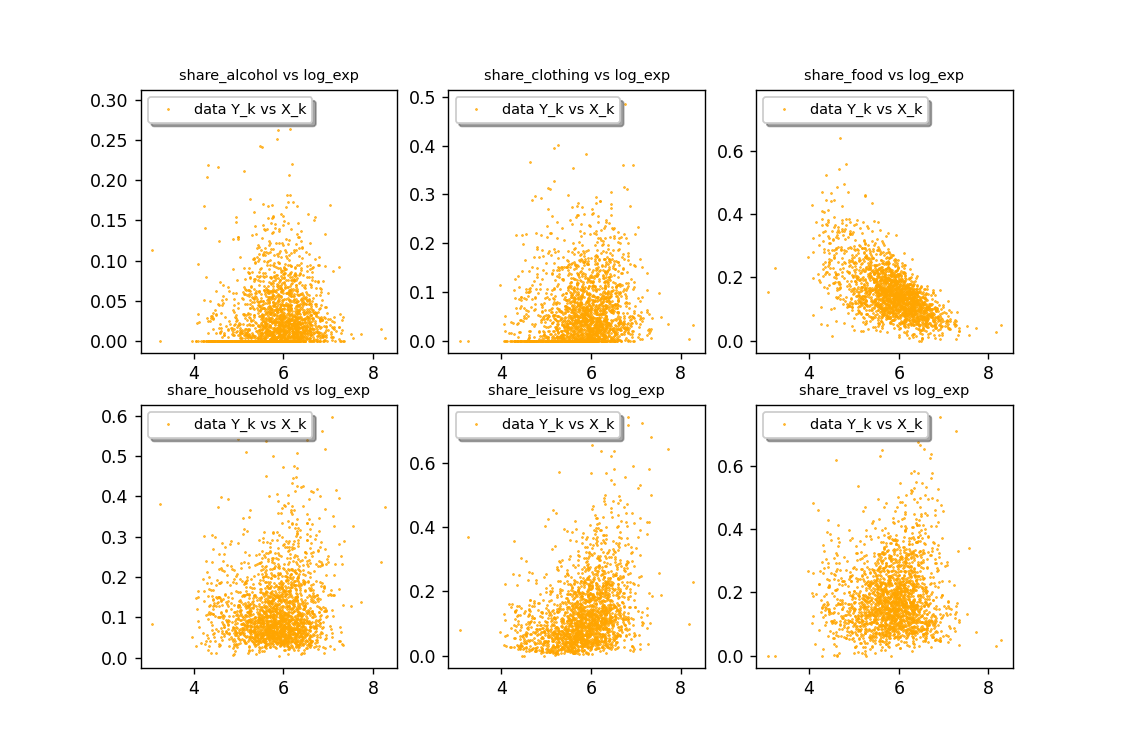

In [61]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)

fig, axes = plt.subplots(2,3)

axes[0,0].plot(X_log_exp,Y_1_alcohol,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 0.5)
# axes[0,0].set_xlabel('X')
# axes[0,0].set_ylabel('Y')
axes[0,0].set_title('share_alcohol vs log_exp', fontsize='small')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='small')

axes[0,1].plot(X_log_exp,Y_2_clothing,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 0.5)
# axes[0,1].set_xlabel('X')
# axes[0,1].set_ylabel('Y')
axes[0,1].set_title('share_clothing vs log_exp', fontsize='small')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='small')

axes[0,2].plot(X_log_exp,Y_3_food,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 0.5)
# axes[0,2].set_xlabel('X')
# axes[0,2].set_ylabel('Y')
axes[0,2].set_title('share_food vs log_exp', fontsize='small')
legend = axes[0,2].legend(loc='upper left', shadow=True, fontsize='small')

axes[1,0].plot(X_log_exp,Y_4_household,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 0.5)
# axes[1,0].set_xlabel('X')
# axes[1,0].set_ylabel('Y')
axes[1,0].set_title('share_household vs log_exp', fontsize='small')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='small')

axes[1,1].plot(X_log_exp,Y_5_leisure,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 0.5)
# axes[1,1].set_xlabel('X')
# axes[1,1].set_ylabel('Y')
axes[1,1].set_title('share_leisure vs log_exp', fontsize='small')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='small')

axes[1,2].plot(X_log_exp,Y_6_travel,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 0.5)
# axes[1,2].set_xlabel('X')
# axes[1,2].set_ylabel('Y')
axes[1,2].set_title('share_travel vs log_exp', fontsize='small')
legend = axes[1,2].legend(loc='upper left', shadow=True, fontsize='small')

plt.show()

$\textbf{Plot X vs W}$

<IPython.core.display.Javascript object>


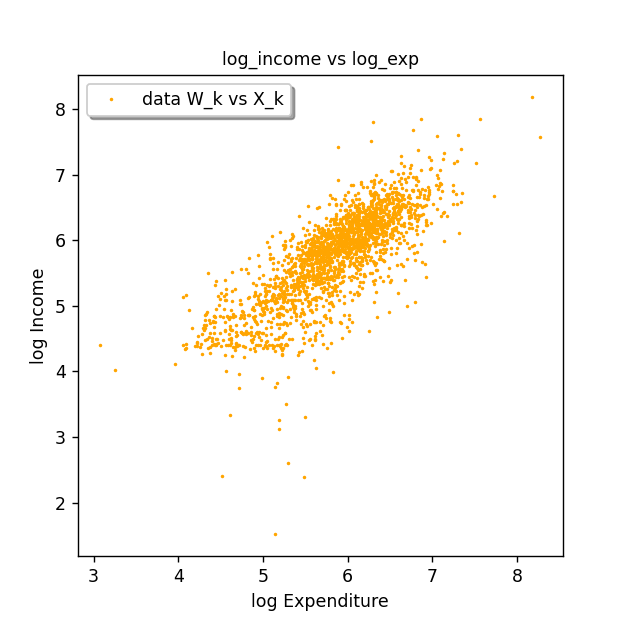

In [62]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (5,5)

fig, axes = plt.subplots()

axes.plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes.set_xlabel('log Expenditure')
axes.set_ylabel('log Income')
axes.set_title('log_income vs log_exp',fontsize='medium')
legend = axes.legend(loc='upper left', shadow=True, fontsize='medium')
plt.show()

# 1- Regression Share_food vs log_expenditure

<IPython.core.display.Javascript object>


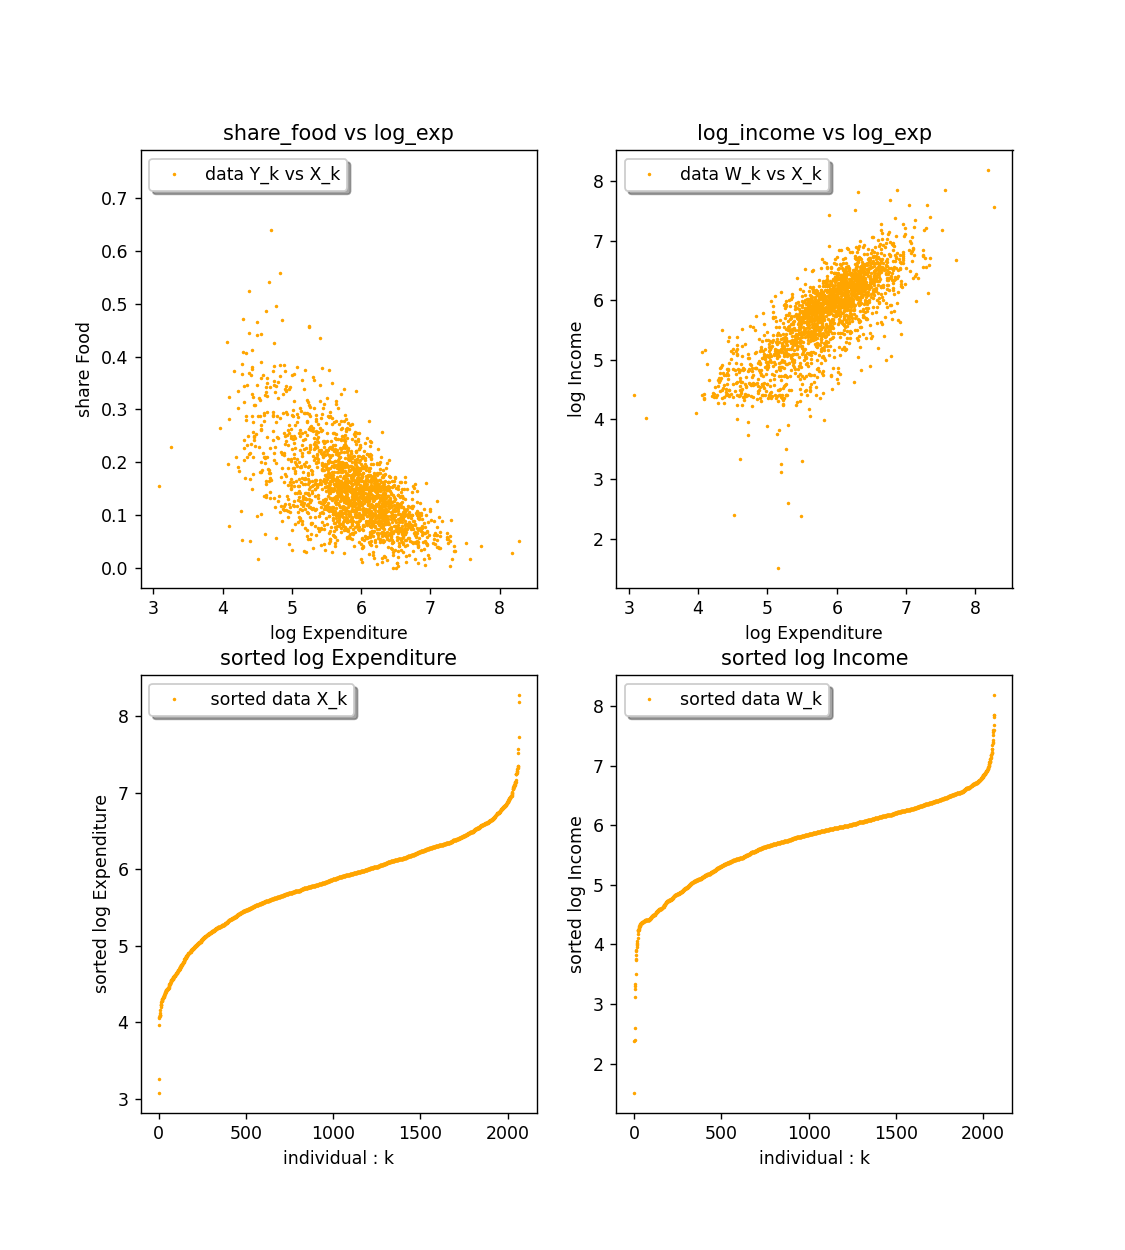

In [63]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,10)

fig, axes = plt.subplots(2,2)

axes[0,0].plot(X_log_exp,Y_3_food,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 1)
axes[0,0].set_xlabel('log Expenditure')
axes[0,0].set_ylabel('share Food')
axes[0,0].set_title('share_food vs log_exp')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[0,1].plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes[0,1].set_xlabel('log Expenditure')
axes[0,1].set_ylabel('log Income')
axes[0,1].set_title('log_income vs log_exp')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,0].plot(np.arange(len(X_log_exp)),np.sort(X_log_exp),'o', color = 'orange', label = ' sorted data X_k',markersize= 1)
axes[1,0].set_title('sorted log Expenditure')
axes[1,0].set_xlabel('individual : k')
axes[1,0].set_ylabel('sorted log Expenditure')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,1].plot(np.arange(len(W_log_income)),np.sort(W_log_income),'o', color = 'orange', label = 'sorted data W_k',markersize= 1)
axes[1,1].set_title('sorted log Income')
axes[1,1].set_xlabel('individual : k')
axes[1,1].set_ylabel('sorted log Income')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='medium')

plt.show()

$\textbf{With data-driven parameter selection rule}$

choice of support of X and Y accordingly to data (reducing number of zeros columns)

In [64]:
m = 100
n = 100

# ##
# kk_min_X = 1
# kk_max_X = 1

# kk_min_W = 1
# kk_max_W = 1

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5



kernel = "gaussian"
save_output =  False
filename = "Trial_data_driven_rule.txt"

[f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill]\
= npir_by_mollif_dd_par_sel_rule(Y_3_food,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)

print("QUASI OPT RULE \n")
[f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta] = disc_quasi_opt_rule(Y_3_food,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)   

 I - Discretization of the problem ... 
 Considered support of X = [4.06, 7.35] 
 
 Considered support of W = [3.74, 7.68] 
 
The original Matrix M has  2 zeros columns 
  whose index are  [2, 95]
 Correction of zeros column with interpolation trick ... 

 II - Regularization process ... 
 Range of regularization parameter = [0.0027 ,  1] .

 Minimization of the objective function of the data-driven rule ... 
 
 regularization parameter computed :) 
 
 Computation of the corresponding regularized solution ...
 
 The Matrix of the F.O.O.C  (dd rule) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule) successful :) 
 Residual = 2.42899E-14  

 The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) 
 
 Resolution of the F.O.O.C (choice Less High Freq) successful :) 
 Residual = 3.23730E-14  

 The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule with HF killed) successful :) 
 Residual = 1.98102E-14  

QUASI OP

<IPython.core.display.Javascript object>


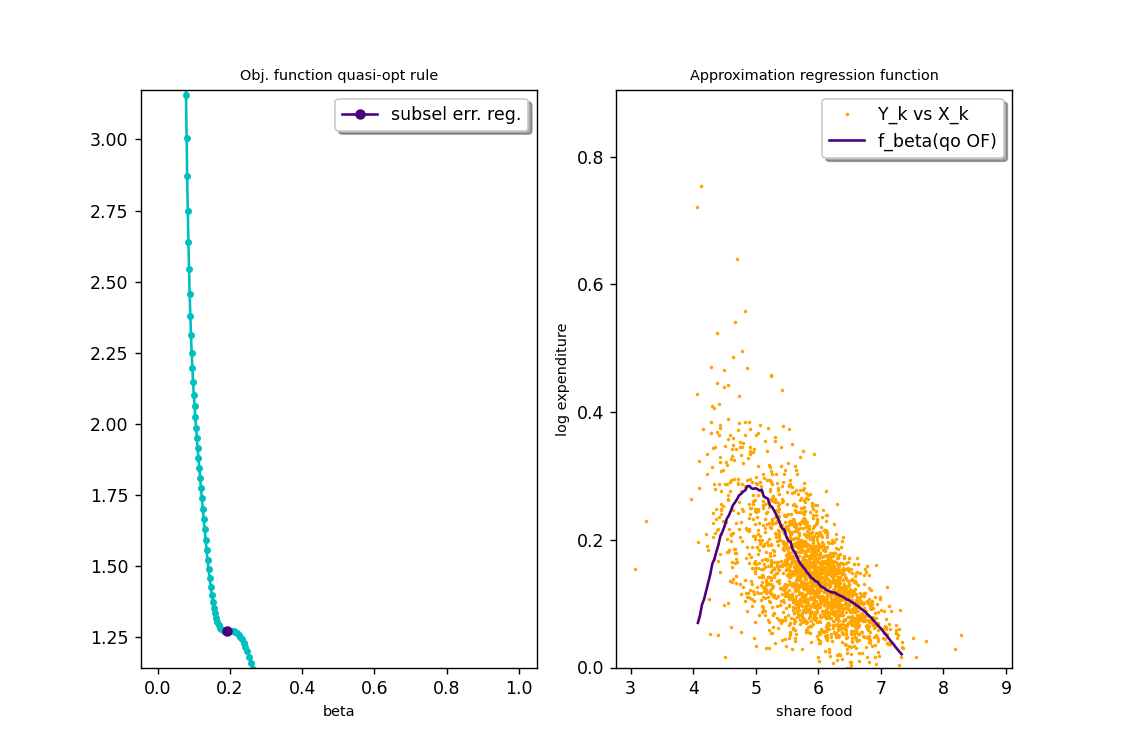

m = 100, n= 100, kernel = gaussian , beta_qo_OF = 0.19078 



In [65]:

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)


fig, axes = plt.subplots(1,2)

## Quasi-optimality parameter choice rule with reg error
axes[0].plot(vec_beta[0:-1],quasi_opt_vec_beta,'c.-')
axes[0].plot(beta_quasi_opt_OF,quasi_opt_min_OF,marker = 'o',color = 'indigo',markersize= 5,label ='subsel err. reg.')
axes[0].set_xlabel('beta', fontsize='small')
axes[0].set_title('Obj. function quasi-opt rule', fontsize='small')
legend = axes[0].legend(loc='best', shadow=True, fontsize='medium')
axes[0].set_ylim([0.9*min(quasi_opt_min_HF,quasi_opt_min_OF), 2.5*max(quasi_opt_min_HF,quasi_opt_min_OF)])
# axes[0].set_xlim([-0.01, 0.1])

axes[1].plot(X_log_exp,Y_3_food,'o', color = 'orange', label = 'Y_k vs X_k',markersize= 1)
axes[1].plot(x_,f_beta_quasi_opt_OF,color = 'indigo',label = 'f_beta(qo OF)')
axes[1].set_xlabel('share food', fontsize='small')
axes[1].set_ylabel('log expenditure', fontsize='small')
legend = axes[1].legend(loc='best', shadow=True, fontsize='medium')
axes[1].set_xlim([0.9*min(X_log_exp), 1.1*max(X_log_exp)])
axes[1].set_ylim([0, 1.2*max(Y_3_food)])
axes[1].set_title('Approximation regression function', fontsize='small')


plt.show()

print("m = %d, n= %d, kernel = %s , beta_qo_OF = %2.5f \n" %(m,n,kernel,beta_quasi_opt_OF))
# print(" beta_dd_rule 1= %2.5g, beta_less_HF = %2.5g, beta_of_HF_kill = %2.5f , beta_qo_HF  = %2.5f, beta_qo_OF = %2.5f"%(beta_obj_func, beta_less_HF,beta_of_HF_kill,beta_quasi_opt_HF,beta_quasi_opt_OF))

$\textbf{Trial Example with interactive choice of regularization parameter}$

$\textbf{a) Interactive choice of $\beta$, $n$, $m$ and convolution kernel}$

In [66]:
%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

import matplotlib.pyplot as plt
def interect_npir_by_mollif(beta_,m_x,n_w,kernel):
    
    save_output =  False
    filename = "Trial.txt"
    print_msg =  False
    [f_x_beta,x_] = regul_npir_by_mollif_single_beta(Y_3_food,X_log_exp,W_log_income,m_x,n_w,beta_,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename,print_msg)
        
    ## manage Figure size
    plt.rcParams["figure.figsize"] = (7,7) # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_3_food,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = 'approx reg. fct. f_beta ')
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share food')
    axes.set_title('non-par. instrum. reg. with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')

    plt.xlim([0.9*min(X_log_exp) , 1.1*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_3_food)])
    plt.show()
    
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.0746000,min=1e-3,max=1,step=1e-3,readout_format='.6g'),
         m_x = widgets.IntSlider(value=100,min=30,max=500,step=10),
         n_w = widgets.IntSlider(value=100,min=30,max=600,step=10),
         kernel = widgets.Dropdown(options=['gaussian', 'cauchy', 'laplace','logistic'],
                                   value='gaussian',
                                   description='Convol kernel',
                                   disabled=False,)
        )


interactive(children=(FloatSlider(value=0.0746, description='beta_', max=1.0, min=0.001, readout_format='.6g',…

<function __main__.interect_npir_by_mollif(beta_, m_x, n_w, kernel)>

$\textbf{b) Interactive choice of $\beta$ with fixed $n$, $m$ and convolution kernel}$

In [67]:
m_x = 100
n_w = 100

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

kernel = 'gaussian'
print_msg = False

[Mat_M,rhs_b,x_node] = Discretization_Gate_function(Y_3_food,X_log_exp,W_log_income,m_x,n_w,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
           
h_x = x_node[1] - x_node[0]
a_x = x_node[0]
b_x = x_node[-1]

M_T     =  Mat_M.T
M_NE    =  M_T @ Mat_M
b_NE    =  M_T @ rhs_b
I_      = np.eye(m_x)

x_ = np.zeros(m_x)
for k in range(m_x):
    x_[k] = (x_node[k] + x_node[k+1])/2
        
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def interect_npir_by_mollif(beta_):
    
    C_beta = Mat_Conv_1d(m_x,h_x,beta_,kernel)
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
#     coef_x_beta = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") 
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)

#     coef_x_beta_s = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual_s    = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
#     f_x_beta_s = coef_x_beta_s
    
    f_x_beta = coef_x_beta
    f_x_beta_kill_HF = kill_high_freq_in_sign(f_x_beta,5)
    
    ## manage Figure size
    # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    plt.rcParams["figure.figsize"] = (9,6) 
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_3_food,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = ' f beta',linewidth=2.5)
#     axes.plot(x_,f_x_beta_s,'g',label = ' f beta s',linewidth=1)
    axes.plot(x_,f_x_beta_kill_HF,'g',label = ' HF_killed{f_beta}',linewidth=2.5)
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share food')
    axes.set_title('npir with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')
    
    plt.xlim([0.9*min(X_log_exp) , 1.2*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_3_food)])
    plt.show()
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    if residual < 1e-10:
        print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E \n" % residual)
    else:
        print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.09,min=1e-4,max=1,step=1e-3,readout_format='.6g')
        )


interactive(children=(FloatSlider(value=0.09, description='beta_', max=1.0, min=0.0001, readout_format='.6g', …

<function __main__.interect_npir_by_mollif(beta_)>

# 2- Regression Share_Household vs log_expenditure

<IPython.core.display.Javascript object>


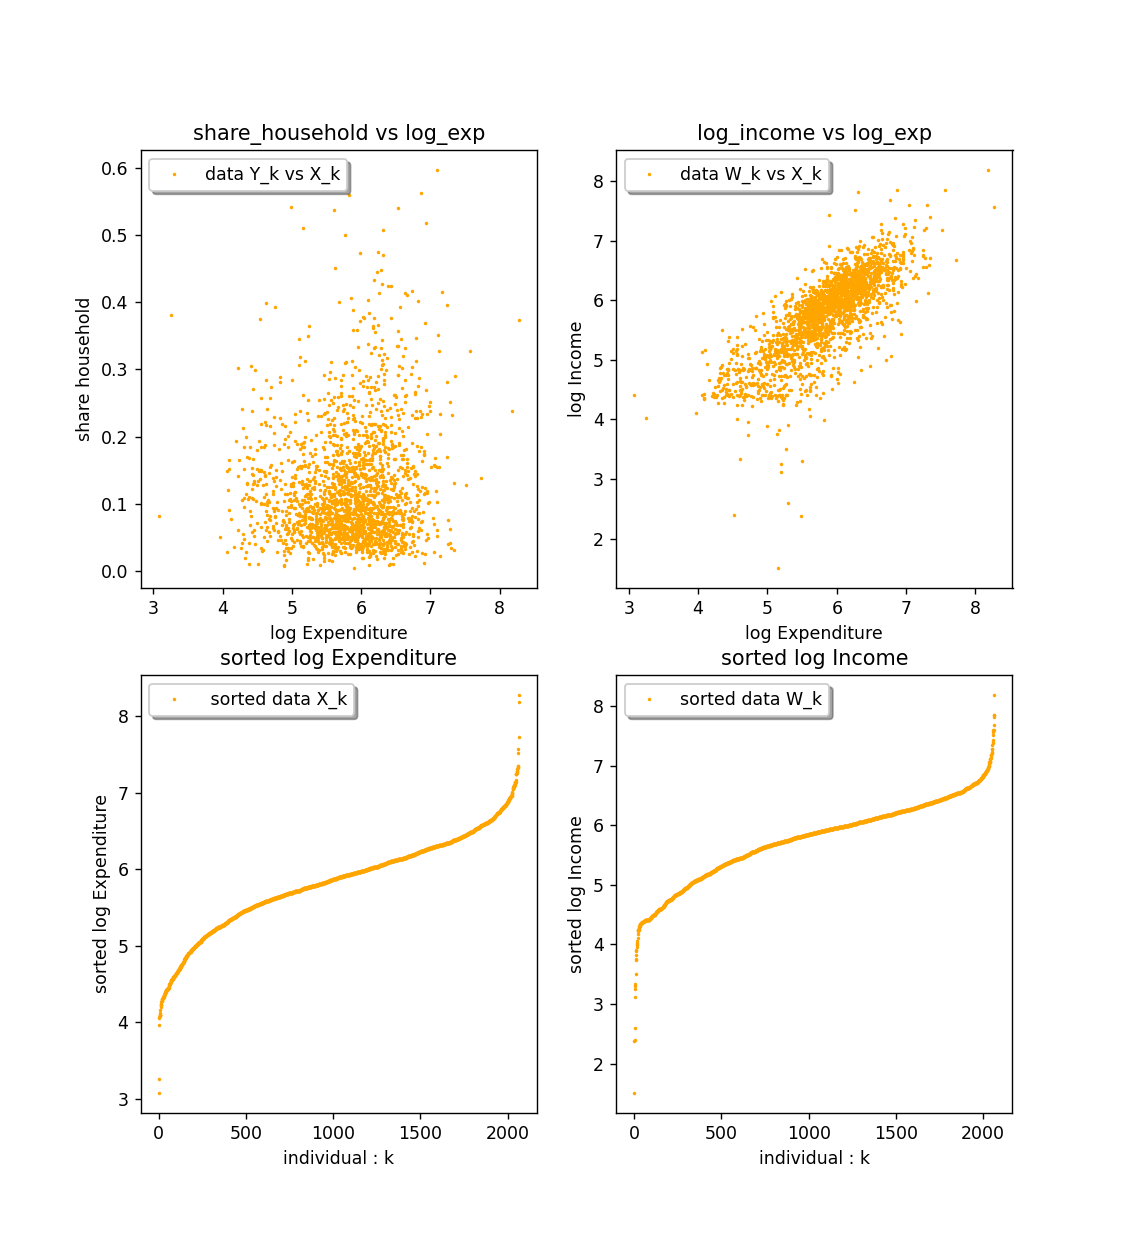

In [68]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,10)

fig, axes = plt.subplots(2,2)

axes[0,0].plot(X_log_exp,Y_4_household,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 1)
axes[0,0].set_xlabel('log Expenditure')
axes[0,0].set_ylabel('share household')
axes[0,0].set_title('share_household vs log_exp')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[0,1].plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes[0,1].set_xlabel('log Expenditure')
axes[0,1].set_ylabel('log Income')
axes[0,1].set_title('log_income vs log_exp')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,0].plot(np.arange(len(X_log_exp)),np.sort(X_log_exp),'o', color = 'orange', label = ' sorted data X_k',markersize= 1)
axes[1,0].set_title('sorted log Expenditure')
axes[1,0].set_xlabel('individual : k')
axes[1,0].set_ylabel('sorted log Expenditure')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,1].plot(np.arange(len(W_log_income)),np.sort(W_log_income),'o', color = 'orange', label = 'sorted data W_k',markersize= 1)
axes[1,1].set_title('sorted log Income')
axes[1,1].set_xlabel('individual : k')
axes[1,1].set_ylabel('sorted log Income')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='medium')

plt.show()

$\textbf{With data-driven parameter selection rule}$

choice of support of X and Y accordingly to data (reducing number of zeros columns)

In [69]:
m = 100
n = 100

# ##
# kk_min_X = 1
# kk_max_X = 1

# kk_min_W = 1
# kk_max_W = 1

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5



kernel = "gaussian"
save_output =  False
filename = "Trial_data_driven_rule.txt"

[f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill]\
= npir_by_mollif_dd_par_sel_rule(Y_4_household,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)

print("QUASI OPT RULE \n")
[f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta] = disc_quasi_opt_rule(Y_4_household,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)   

 I - Discretization of the problem ... 
 Considered support of X = [4.06, 7.35] 
 
 Considered support of W = [3.74, 7.68] 
 
The original Matrix M has  2 zeros columns 
  whose index are  [2, 95]
 Correction of zeros column with interpolation trick ... 

 II - Regularization process ... 
 Range of regularization parameter = [0.0027 ,  1] .

 Minimization of the objective function of the data-driven rule ... 
 
 regularization parameter computed :) 
 
 Computation of the corresponding regularized solution ...
 
 The Matrix of the F.O.O.C  (dd rule) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule) successful :) 
 Residual = 9.75792E-14  

 The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) 
 
 Resolution of the F.O.O.C (choice Less High Freq) successful :) 
 Residual = 3.10452E-14  

 The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule with HF killed) successful :) 
 Residual = 2.25905E-14  

QUASI OP

<IPython.core.display.Javascript object>


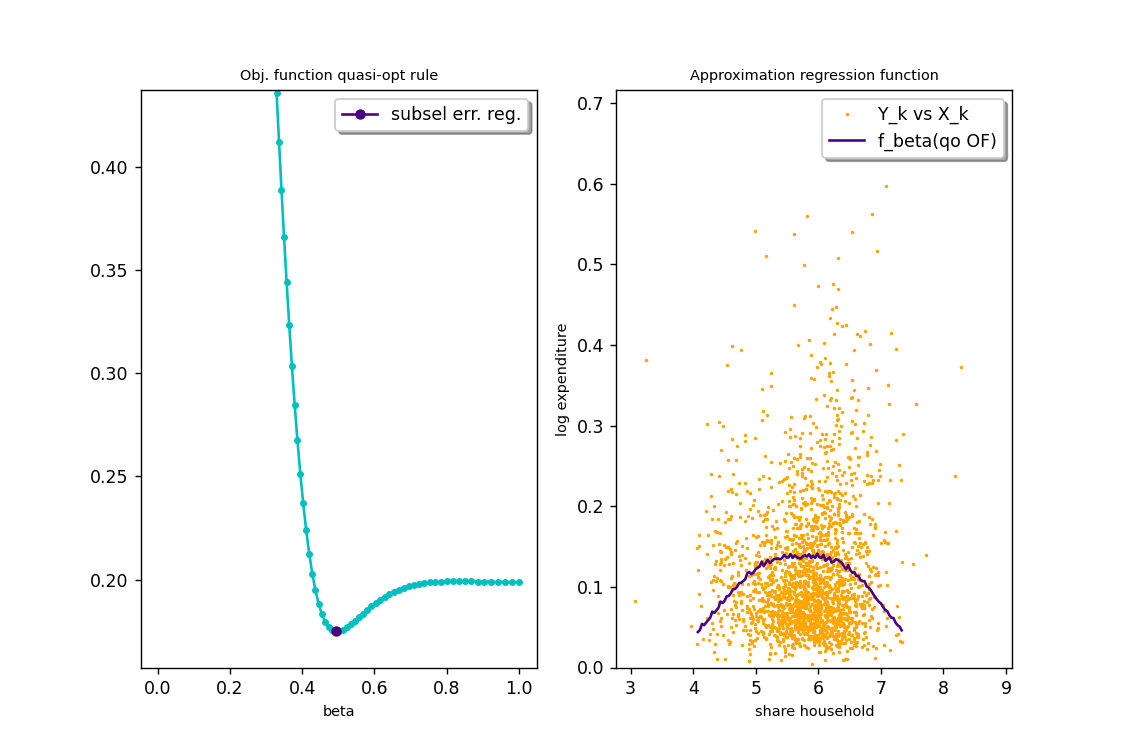

m = 100, n= 100, kernel = gaussian , beta_qo_OF = 0.49307 



In [70]:

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)


fig, axes = plt.subplots(1,2)

## Quasi-optimality parameter choice rule with reg error
axes[0].plot(vec_beta[0:-1],quasi_opt_vec_beta,'c.-')
axes[0].plot(beta_quasi_opt_OF,quasi_opt_min_OF,marker = 'o',color = 'indigo',markersize= 5,label ='subsel err. reg.')
axes[0].set_xlabel('beta', fontsize='small')
axes[0].set_title('Obj. function quasi-opt rule', fontsize='small')
legend = axes[0].legend(loc='best', shadow=True, fontsize='medium')
axes[0].set_ylim([0.9*min(quasi_opt_min_HF,quasi_opt_min_OF), 2.5*max(quasi_opt_min_HF,quasi_opt_min_OF)])
# axes[0].set_xlim([-0.01, 0.1])

axes[1].plot(X_log_exp,Y_4_household,'o', color = 'orange', label = 'Y_k vs X_k',markersize= 1)
axes[1].plot(x_,f_beta_quasi_opt_OF,color = 'indigo',label = 'f_beta(qo OF)')
axes[1].set_xlabel('share household', fontsize='small')
axes[1].set_ylabel('log expenditure', fontsize='small')
legend = axes[1].legend(loc='best', shadow=True, fontsize='medium')
axes[1].set_xlim([0.9*min(X_log_exp), 1.1*max(X_log_exp)])
axes[1].set_ylim([0, 1.2*max(Y_4_household)])
axes[1].set_title('Approximation regression function', fontsize='small')


plt.show()

print("m = %d, n= %d, kernel = %s , beta_qo_OF = %2.5f \n" %(m,n,kernel,beta_quasi_opt_OF))
# print(" beta_dd_rule 1= %2.5g, beta_less_HF = %2.5g, beta_of_HF_kill = %2.5f , beta_qo_HF  = %2.5f, beta_qo_OF = %2.5f"%(beta_obj_func, beta_less_HF,beta_of_HF_kill,beta_quasi_opt_HF,beta_quasi_opt_OF))

$\textbf{Trial Example with interactive choice of regularization parameter}$

$\textbf{a) Interactive choice of $\beta$, $n$, $m$ and convolution kernel}$

In [71]:
%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

import matplotlib.pyplot as plt
def interect_npir_by_mollif(beta_,m_x,n_w,kernel):
    
    save_output =  False
    filename = "Trial.txt"
    print_msg =  False
    [f_x_beta,x_] = regul_npir_by_mollif_single_beta(Y_4_household,X_log_exp,W_log_income,m_x,n_w,beta_,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename,print_msg)
        
    ## manage Figure size
    plt.rcParams["figure.figsize"] = (7,7) # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_4_household,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = 'approx reg. fct. f_beta ')
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share household')
    axes.set_title('non-par. instrum. reg. with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')

    plt.xlim([0.9*min(X_log_exp) , 1.1*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_4_household)])
    plt.show()
    
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.0746000,min=1e-3,max=1,step=1e-3,readout_format='.6g'),
         m_x = widgets.IntSlider(value=100,min=30,max=500,step=10),
         n_w = widgets.IntSlider(value=100,min=30,max=600,step=10),
         kernel = widgets.Dropdown(options=['gaussian', 'cauchy', 'laplace','logistic'],
                                   value='gaussian',
                                   description='Convol kernel',
                                   disabled=False,)
        )


interactive(children=(FloatSlider(value=0.0746, description='beta_', max=1.0, min=0.001, readout_format='.6g',…

<function __main__.interect_npir_by_mollif(beta_, m_x, n_w, kernel)>

$\textbf{b) Interactive choice of $\beta$ with fixed $n$, $m$ and convolution kernel}$

In [72]:
m_x = 100
n_w = 100

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

kernel = 'gaussian'
print_msg = False

[Mat_M,rhs_b,x_node] = Discretization_Gate_function(Y_4_household,X_log_exp,W_log_income,m_x,n_w,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
           
h_x = x_node[1] - x_node[0]
a_x = x_node[0]
b_x = x_node[-1]

M_T     =  Mat_M.T
M_NE    =  M_T @ Mat_M
b_NE    =  M_T @ rhs_b
I_      = np.eye(m_x)

x_ = np.zeros(m_x)
for k in range(m_x):
    x_[k] = (x_node[k] + x_node[k+1])/2
        
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def interect_npir_by_mollif(beta_):
    
    C_beta = Mat_Conv_1d(m_x,h_x,beta_,kernel)
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
#     coef_x_beta = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") 
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)

#     coef_x_beta_s = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual_s    = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
#     f_x_beta_s = coef_x_beta_s
    
    f_x_beta = coef_x_beta
    f_x_beta_kill_HF = kill_high_freq_in_sign(f_x_beta,5)
    
    ## manage Figure size
    # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    plt.rcParams["figure.figsize"] = (9,6) 
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_4_household,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = ' f beta',linewidth=2.5)
#     axes.plot(x_,f_x_beta_s,'g',label = ' f beta s',linewidth=1)
    axes.plot(x_,f_x_beta_kill_HF,'g',label = ' HF_killed{f_beta}',linewidth=2.5)
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share household')
    axes.set_title('npir with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')
    
    plt.xlim([0.9*min(X_log_exp) , 1.2*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_4_household)])
    plt.show()
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    if residual < 1e-10:
        print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E \n" % residual)
    else:
        print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.09,min=1e-4,max=1,step=1e-3,readout_format='.6g')
        )


interactive(children=(FloatSlider(value=0.09, description='beta_', max=1.0, min=0.0001, readout_format='.6g', …

<function __main__.interect_npir_by_mollif(beta_)>

# 3- Regression Share_leisure vs log_expenditure

<IPython.core.display.Javascript object>


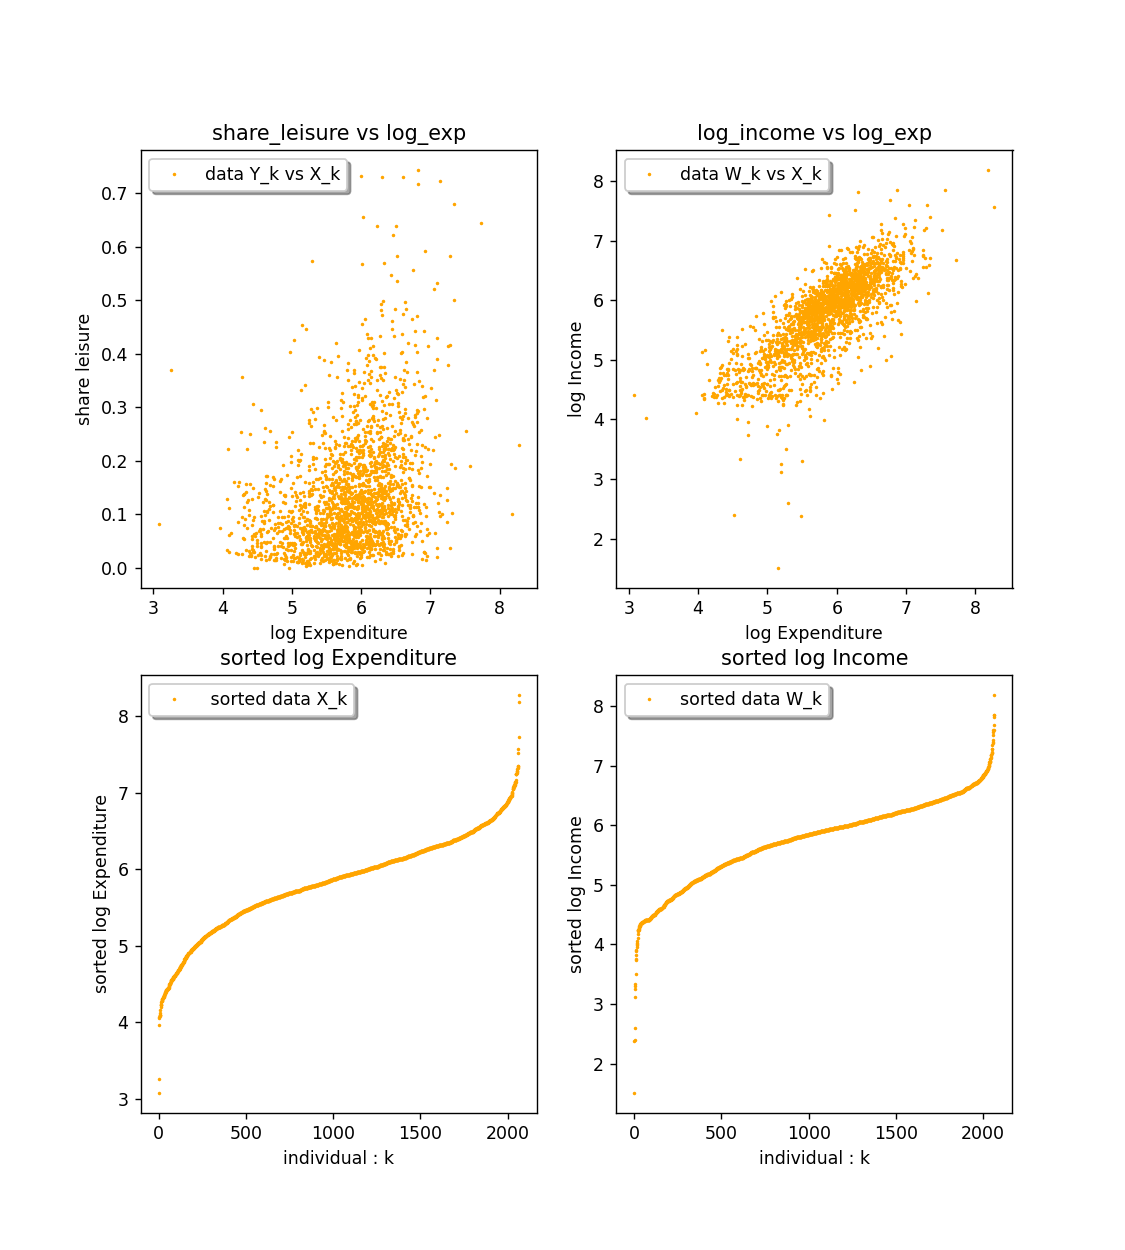

In [73]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,10)

fig, axes = plt.subplots(2,2)

axes[0,0].plot(X_log_exp,Y_5_leisure,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 1)
axes[0,0].set_xlabel('log Expenditure')
axes[0,0].set_ylabel('share leisure')
axes[0,0].set_title('share_leisure vs log_exp')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[0,1].plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes[0,1].set_xlabel('log Expenditure')
axes[0,1].set_ylabel('log Income')
axes[0,1].set_title('log_income vs log_exp')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,0].plot(np.arange(len(X_log_exp)),np.sort(X_log_exp),'o', color = 'orange', label = ' sorted data X_k',markersize= 1)
axes[1,0].set_title('sorted log Expenditure')
axes[1,0].set_xlabel('individual : k')
axes[1,0].set_ylabel('sorted log Expenditure')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,1].plot(np.arange(len(W_log_income)),np.sort(W_log_income),'o', color = 'orange', label = 'sorted data W_k',markersize= 1)
axes[1,1].set_title('sorted log Income')
axes[1,1].set_xlabel('individual : k')
axes[1,1].set_ylabel('sorted log Income')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='medium')

plt.show()

$\textbf{With data-driven parameter selection rule}$

choice of support of X and Y accordingly to data (reducing number of zeros columns)

In [74]:
m = 100
n = 100

# ##
# kk_min_X = 1
# kk_max_X = 1

# kk_min_W = 1
# kk_max_W = 1

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5



kernel = "gaussian"
save_output =  False
filename = "Trial_data_driven_rule.txt"

[f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill]\
= npir_by_mollif_dd_par_sel_rule(Y_5_leisure,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)

print("QUASI OPT RULE \n")
[f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta] = disc_quasi_opt_rule(Y_5_leisure,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)   

 I - Discretization of the problem ... 
 Considered support of X = [4.06, 7.35] 
 
 Considered support of W = [3.74, 7.68] 
 
The original Matrix M has  2 zeros columns 
  whose index are  [2, 95]
 Correction of zeros column with interpolation trick ... 

 II - Regularization process ... 
 Range of regularization parameter = [0.0027 ,  1] .

 Minimization of the objective function of the data-driven rule ... 
 
 regularization parameter computed :) 
 
 Computation of the corresponding regularized solution ...
 
 The Matrix of the F.O.O.C  (dd rule) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule) successful :) 
 Residual = 3.70626E-14  

 The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) 
 
 Resolution of the F.O.O.C (choice Less High Freq) successful :) 
 Residual = 3.13044E-14  

 The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule with HF killed) successful :) 
 Residual = 2.52738E-14  

QUASI OP

<IPython.core.display.Javascript object>


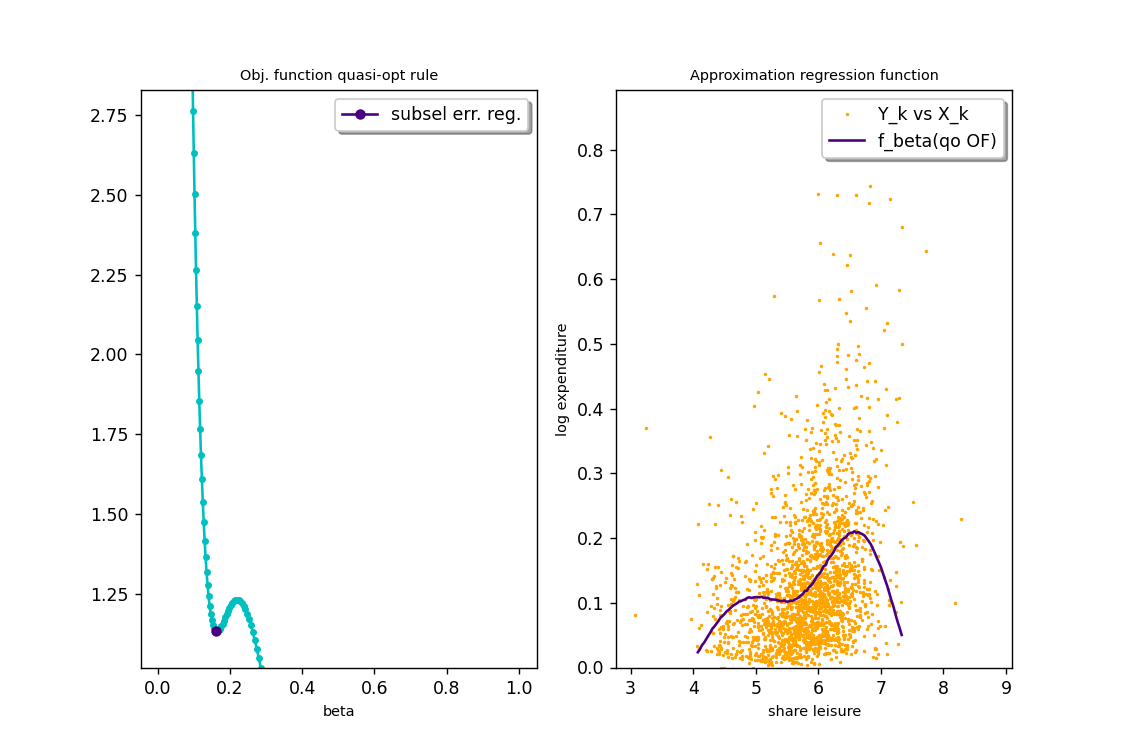

m = 100, n= 100, kernel = gaussian , beta_qo_OF = 0.16231 



In [75]:

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)


fig, axes = plt.subplots(1,2)

## Quasi-optimality parameter choice rule with reg error
axes[0].plot(vec_beta[0:-1],quasi_opt_vec_beta,'c.-')
axes[0].plot(beta_quasi_opt_OF,quasi_opt_min_OF,marker = 'o',color = 'indigo',markersize= 5,label ='subsel err. reg.')
axes[0].set_xlabel('beta', fontsize='small')
axes[0].set_title('Obj. function quasi-opt rule', fontsize='small')
legend = axes[0].legend(loc='best', shadow=True, fontsize='medium')
axes[0].set_ylim([0.9*min(quasi_opt_min_HF,quasi_opt_min_OF), 2.5*max(quasi_opt_min_HF,quasi_opt_min_OF)])
# axes[0].set_xlim([-0.01, 0.1])

axes[1].plot(X_log_exp,Y_5_leisure,'o', color = 'orange', label = 'Y_k vs X_k',markersize= 1)
axes[1].plot(x_,f_beta_quasi_opt_OF,color = 'indigo',label = 'f_beta(qo OF)')
axes[1].set_xlabel('share leisure', fontsize='small')
axes[1].set_ylabel('log expenditure', fontsize='small')
legend = axes[1].legend(loc='best', shadow=True, fontsize='medium')
axes[1].set_xlim([0.9*min(X_log_exp), 1.1*max(X_log_exp)])
axes[1].set_ylim([0, 1.2*max(Y_5_leisure)])
axes[1].set_title('Approximation regression function', fontsize='small')


plt.show()

print("m = %d, n= %d, kernel = %s , beta_qo_OF = %2.5f \n" %(m,n,kernel,beta_quasi_opt_OF))
# print(" beta_dd_rule 1= %2.5g, beta_less_HF = %2.5g, beta_of_HF_kill = %2.5f , beta_qo_HF  = %2.5f, beta_qo_OF = %2.5f"%(beta_obj_func, beta_less_HF,beta_of_HF_kill,beta_quasi_opt_HF,beta_quasi_opt_OF))

$\textbf{Trial Example with interactive choice of regularization parameter}$

$\textbf{a) Interactive choice of $\beta$, $n$, $m$ and convolution kernel}$

In [76]:
%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

import matplotlib.pyplot as plt
def interect_npir_by_mollif(beta_,m_x,n_w,kernel):
    
    save_output =  False
    filename = "Trial.txt"
    print_msg =  False
    [f_x_beta,x_] = regul_npir_by_mollif_single_beta(Y_5_leisure,X_log_exp,W_log_income,m_x,n_w,beta_,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename,print_msg)
        
    ## manage Figure size
    plt.rcParams["figure.figsize"] = (7,7) # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_5_leisure,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = 'approx reg. fct. f_beta ')
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share leisure')
    axes.set_title('non-par. instrum. reg. with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')

    plt.xlim([0.9*min(X_log_exp) , 1.1*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_5_leisure)])
    plt.show()
    
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.0746000,min=1e-3,max=1,step=1e-3,readout_format='.6g'),
         m_x = widgets.IntSlider(value=100,min=30,max=500,step=10),
         n_w = widgets.IntSlider(value=100,min=30,max=600,step=10),
         kernel = widgets.Dropdown(options=['gaussian', 'cauchy', 'laplace','logistic'],
                                   value='gaussian',
                                   description='Convol kernel',
                                   disabled=False,)
        )


interactive(children=(FloatSlider(value=0.0746, description='beta_', max=1.0, min=0.001, readout_format='.6g',…

<function __main__.interect_npir_by_mollif(beta_, m_x, n_w, kernel)>

$\textbf{b) Interactive choice of $\beta$ with fixed $n$, $m$ and convolution kernel}$

In [77]:
m_x = 100
n_w = 100

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

kernel = 'gaussian'
print_msg = False

[Mat_M,rhs_b,x_node] = Discretization_Gate_function(Y_5_leisure,X_log_exp,W_log_income,m_x,n_w,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
           
h_x = x_node[1] - x_node[0]
a_x = x_node[0]
b_x = x_node[-1]

M_T     =  Mat_M.T
M_NE    =  M_T @ Mat_M
b_NE    =  M_T @ rhs_b
I_      = np.eye(m_x)

x_ = np.zeros(m_x)
for k in range(m_x):
    x_[k] = (x_node[k] + x_node[k+1])/2
        
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def interect_npir_by_mollif(beta_):
    
    C_beta = Mat_Conv_1d(m_x,h_x,beta_,kernel)
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
#     coef_x_beta = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") 
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)

#     coef_x_beta_s = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual_s    = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
#     f_x_beta_s = coef_x_beta_s
    
    f_x_beta = coef_x_beta
    f_x_beta_kill_HF = kill_high_freq_in_sign(f_x_beta,5)
    
    ## manage Figure size
    # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    plt.rcParams["figure.figsize"] = (9,6) 
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_5_leisure,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = ' f beta',linewidth=2.5)
#     axes.plot(x_,f_x_beta_s,'g',label = ' f beta s',linewidth=1)
    axes.plot(x_,f_x_beta_kill_HF,'g',label = ' HF_killed{f_beta}',linewidth=2.5)
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share leisure')
    axes.set_title('npir with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')
    
    plt.xlim([0.9*min(X_log_exp) , 1.2*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_5_leisure)])
    plt.show()
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    if residual < 1e-10:
        print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E \n" % residual)
    else:
        print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.09,min=1e-4,max=1,step=1e-3,readout_format='.6g')
        )


interactive(children=(FloatSlider(value=0.09, description='beta_', max=1.0, min=0.0001, readout_format='.6g', …

<function __main__.interect_npir_by_mollif(beta_)>

# 4- Regression Share_travel vs log_expenditure

<IPython.core.display.Javascript object>


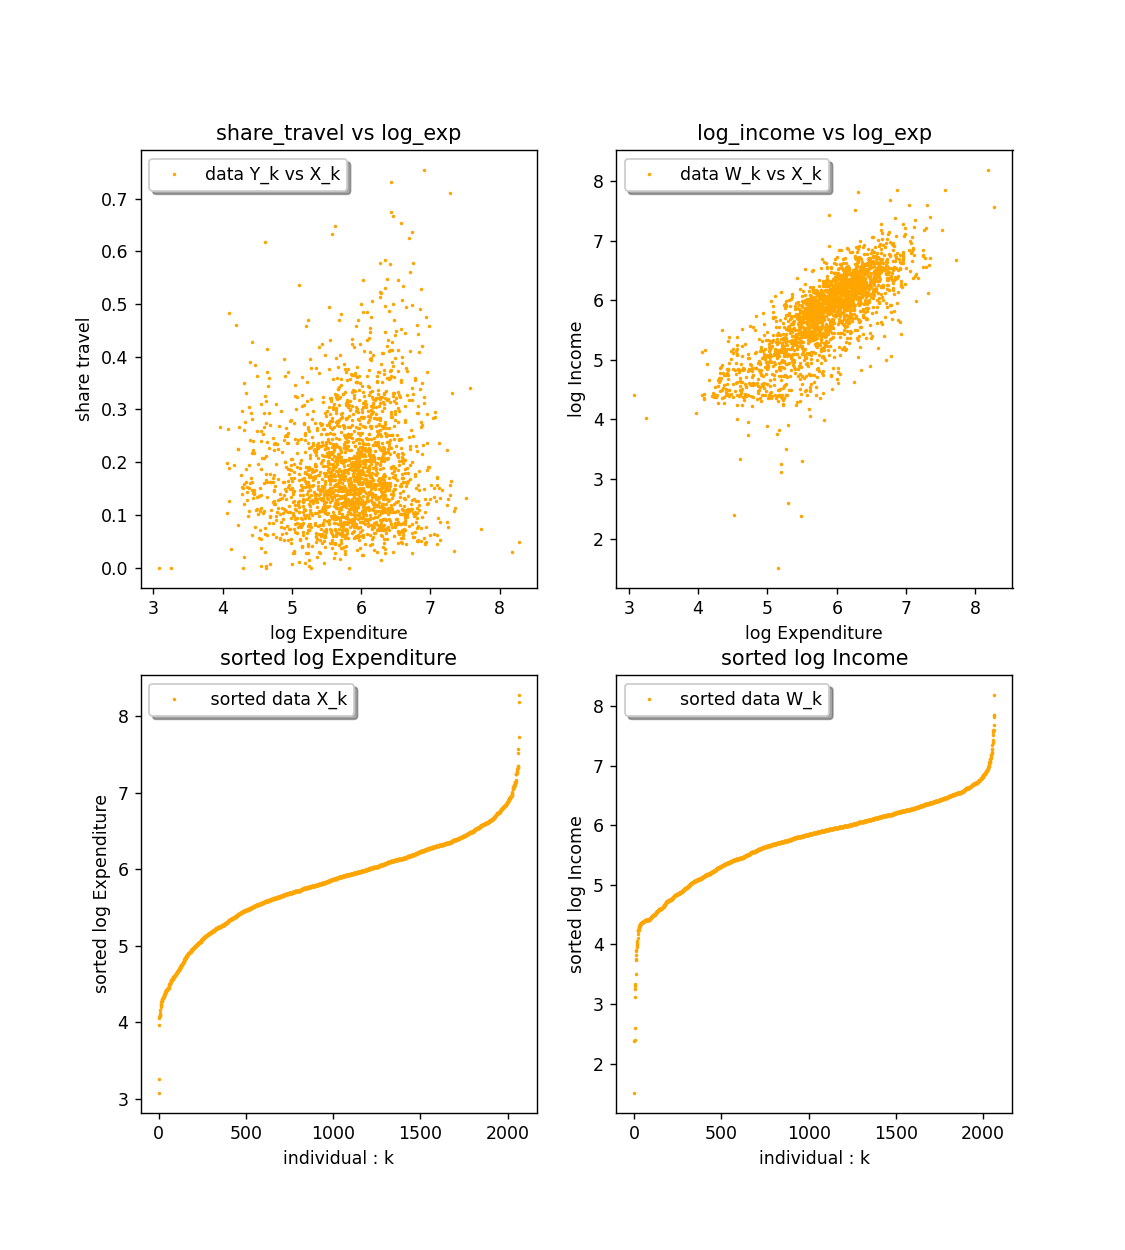

In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,10)

fig, axes = plt.subplots(2,2)

axes[0,0].plot(X_log_exp,Y_6_travel,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 1)
axes[0,0].set_xlabel('log Expenditure')
axes[0,0].set_ylabel('share travel')
axes[0,0].set_title('share_travel vs log_exp')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[0,1].plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes[0,1].set_xlabel('log Expenditure')
axes[0,1].set_ylabel('log Income')
axes[0,1].set_title('log_income vs log_exp')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,0].plot(np.arange(len(X_log_exp)),np.sort(X_log_exp),'o', color = 'orange', label = ' sorted data X_k',markersize= 1)
axes[1,0].set_title('sorted log Expenditure')
axes[1,0].set_xlabel('individual : k')
axes[1,0].set_ylabel('sorted log Expenditure')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,1].plot(np.arange(len(W_log_income)),np.sort(W_log_income),'o', color = 'orange', label = 'sorted data W_k',markersize= 1)
axes[1,1].set_title('sorted log Income')
axes[1,1].set_xlabel('individual : k')
axes[1,1].set_ylabel('sorted log Income')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='medium')

plt.show()

$\textbf{With data-driven parameter selection rule}$

choice of support of X and Y accordingly to data (reducing number of zeros columns)

In [79]:
m = 100
n = 100

# ##
# kk_min_X = 1
# kk_max_X = 1

# kk_min_W = 1
# kk_max_W = 1

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5



kernel = "gaussian"
save_output =  False
filename = "Trial_data_driven_rule.txt"

[f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill]\
= npir_by_mollif_dd_par_sel_rule(Y_6_travel,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)

print("QUASI OPT RULE \n")
[f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta] = disc_quasi_opt_rule(Y_6_travel,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)   

 I - Discretization of the problem ... 
 Considered support of X = [4.06, 7.35] 
 
 Considered support of W = [3.74, 7.68] 
 
The original Matrix M has  2 zeros columns 
  whose index are  [2, 95]
 Correction of zeros column with interpolation trick ... 

 II - Regularization process ... 
 Range of regularization parameter = [0.0027 ,  1] .

 Minimization of the objective function of the data-driven rule ... 
 
 regularization parameter computed :) 
 
 Computation of the corresponding regularized solution ...
 
 The Matrix of the F.O.O.C  (dd rule) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule) successful :) 
 Residual = 4.45336E-14  

 The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) 
 
 Resolution of the F.O.O.C (choice Less High Freq) successful :) 
 Residual = 4.11448E-14  

 The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule with HF killed) successful :) 
 Residual = 7.07722E-14  

QUASI OP

<IPython.core.display.Javascript object>


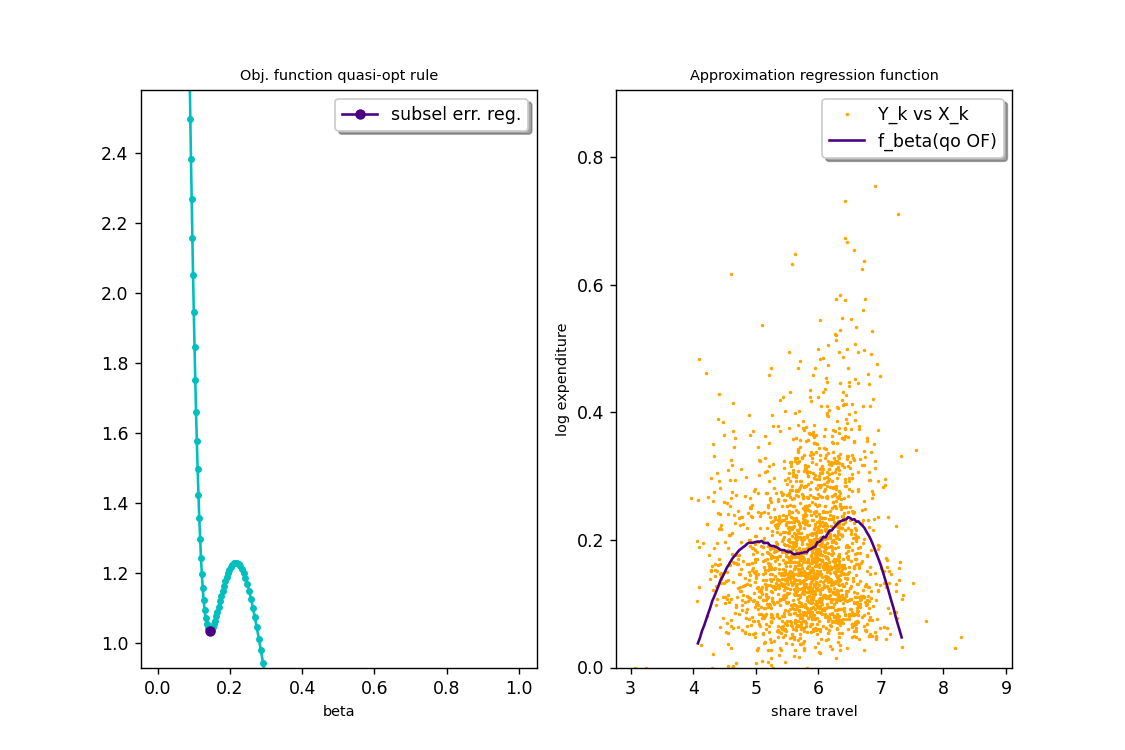

m = 100, n= 100, kernel = gaussian , beta_qo_OF = 0.14378 



In [80]:

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)


fig, axes = plt.subplots(1,2)

## Quasi-optimality parameter choice rule with reg error
axes[0].plot(vec_beta[0:-1],quasi_opt_vec_beta,'c.-')
axes[0].plot(beta_quasi_opt_OF,quasi_opt_min_OF,marker = 'o',color = 'indigo',markersize= 5,label ='subsel err. reg.')
axes[0].set_xlabel('beta', fontsize='small')
axes[0].set_title('Obj. function quasi-opt rule', fontsize='small')
legend = axes[0].legend(loc='best', shadow=True, fontsize='medium')
axes[0].set_ylim([0.9*min(quasi_opt_min_HF,quasi_opt_min_OF), 2.5*max(quasi_opt_min_HF,quasi_opt_min_OF)])
# axes[0].set_xlim([-0.01, 0.1])

axes[1].plot(X_log_exp,Y_6_travel,'o', color = 'orange', label = 'Y_k vs X_k',markersize= 1)
axes[1].plot(x_,f_beta_quasi_opt_OF,color = 'indigo',label = 'f_beta(qo OF)')
axes[1].set_xlabel('share travel', fontsize='small')
axes[1].set_ylabel('log expenditure', fontsize='small')
legend = axes[1].legend(loc='best', shadow=True, fontsize='medium')
axes[1].set_xlim([0.9*min(X_log_exp), 1.1*max(X_log_exp)])
axes[1].set_ylim([0, 1.2*max(Y_6_travel)])
axes[1].set_title('Approximation regression function', fontsize='small')


plt.show()

print("m = %d, n= %d, kernel = %s , beta_qo_OF = %2.5f \n" %(m,n,kernel,beta_quasi_opt_OF))
# print(" beta_dd_rule 1= %2.5g, beta_less_HF = %2.5g, beta_of_HF_kill = %2.5f , beta_qo_HF  = %2.5f, beta_qo_OF = %2.5f"%(beta_obj_func, beta_less_HF,beta_of_HF_kill,beta_quasi_opt_HF,beta_quasi_opt_OF))

$\textbf{Trial Example with interactive choice of regularization parameter}$

$\textbf{a) Interactive choice of $\beta$, $n$, $m$ and convolution kernel}$

In [81]:
%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

import matplotlib.pyplot as plt
def interect_npir_by_mollif(beta_,m_x,n_w,kernel):
    
    save_output =  False
    filename = "Trial.txt"
    print_msg =  False
    [f_x_beta,x_] = regul_npir_by_mollif_single_beta(Y_6_travel,X_log_exp,W_log_income,m_x,n_w,beta_,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename,print_msg)
        
    ## manage Figure size
    plt.rcParams["figure.figsize"] = (7,7) # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_6_travel,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = 'approx reg. fct. f_beta ')
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share travel')
    axes.set_title('non-par. instrum. reg. with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')

    plt.xlim([0.9*min(X_log_exp) , 1.1*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_6_travel)])
    plt.show()
    
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.0746000,min=1e-3,max=1,step=1e-3,readout_format='.6g'),
         m_x = widgets.IntSlider(value=100,min=30,max=500,step=10),
         n_w = widgets.IntSlider(value=100,min=30,max=600,step=10),
         kernel = widgets.Dropdown(options=['gaussian', 'cauchy', 'laplace','logistic'],
                                   value='gaussian',
                                   description='Convol kernel',
                                   disabled=False,)
        )


interactive(children=(FloatSlider(value=0.0746, description='beta_', max=1.0, min=0.001, readout_format='.6g',…

<function __main__.interect_npir_by_mollif(beta_, m_x, n_w, kernel)>

$\textbf{b) Interactive choice of $\beta$ with fixed $n$, $m$ and convolution kernel}$

In [82]:
m_x = 100
n_w = 100

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

kernel = 'gaussian'
print_msg = False

[Mat_M,rhs_b,x_node] = Discretization_Gate_function(Y_6_travel,X_log_exp,W_log_income,m_x,n_w,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
           
h_x = x_node[1] - x_node[0]
a_x = x_node[0]
b_x = x_node[-1]

M_T     =  Mat_M.T
M_NE    =  M_T @ Mat_M
b_NE    =  M_T @ rhs_b
I_      = np.eye(m_x)

x_ = np.zeros(m_x)
for k in range(m_x):
    x_[k] = (x_node[k] + x_node[k+1])/2
        
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def interect_npir_by_mollif(beta_):
    
    C_beta = Mat_Conv_1d(m_x,h_x,beta_,kernel)
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
#     coef_x_beta = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") 
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)

#     coef_x_beta_s = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual_s    = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
#     f_x_beta_s = coef_x_beta_s
    
    f_x_beta = coef_x_beta
    f_x_beta_kill_HF = kill_high_freq_in_sign(f_x_beta,5)
    
    ## manage Figure size
    # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    plt.rcParams["figure.figsize"] = (9,6) 
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_6_travel,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = ' f beta',linewidth=2.5)
#     axes.plot(x_,f_x_beta_s,'g',label = ' f beta s',linewidth=1)
    axes.plot(x_,f_x_beta_kill_HF,'g',label = ' HF_killed{f_beta}',linewidth=2.5)
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share travel')
    axes.set_title('npir with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')
    
    plt.xlim([0.9*min(X_log_exp) , 1.2*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_6_travel)])
    plt.show()
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    if residual < 1e-10:
        print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E \n" % residual)
    else:
        print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.09,min=1e-4,max=1,step=1e-3,readout_format='.6g')
        )


interactive(children=(FloatSlider(value=0.09, description='beta_', max=1.0, min=0.0001, readout_format='.6g', …

<function __main__.interect_npir_by_mollif(beta_)>

# 5- Regression Share_alcohol vs log_expenditure

<IPython.core.display.Javascript object>


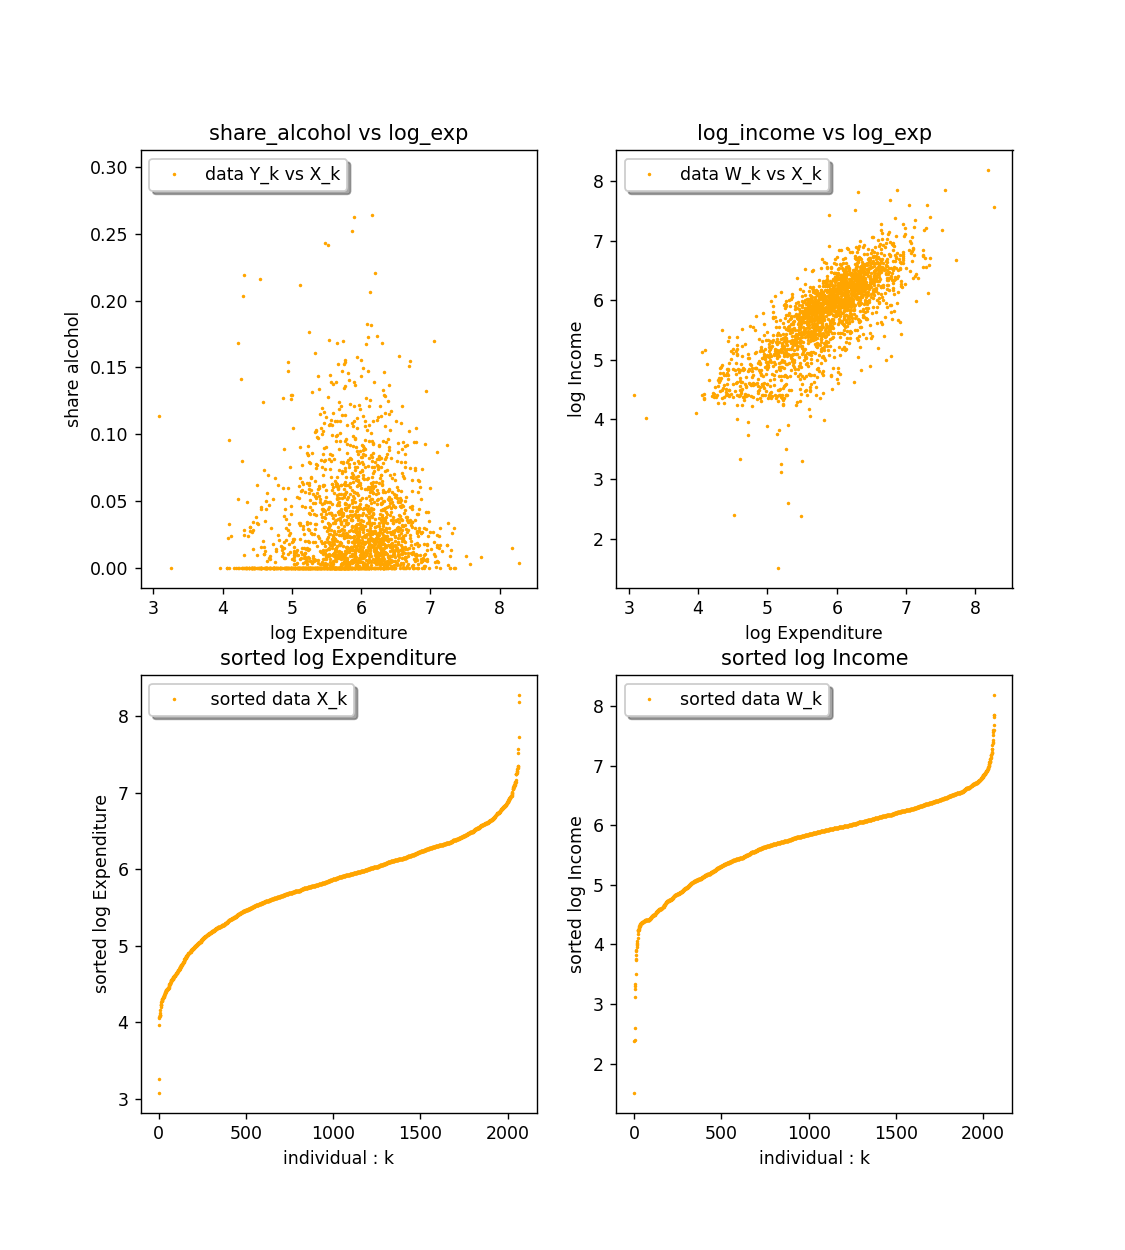

In [83]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,10)

fig, axes = plt.subplots(2,2)

axes[0,0].plot(X_log_exp,Y_1_alcohol,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 1)
axes[0,0].set_xlabel('log Expenditure')
axes[0,0].set_ylabel('share alcohol')
axes[0,0].set_title('share_alcohol vs log_exp')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[0,1].plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes[0,1].set_xlabel('log Expenditure')
axes[0,1].set_ylabel('log Income')
axes[0,1].set_title('log_income vs log_exp')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,0].plot(np.arange(len(X_log_exp)),np.sort(X_log_exp),'o', color = 'orange', label = ' sorted data X_k',markersize= 1)
axes[1,0].set_title('sorted log Expenditure')
axes[1,0].set_xlabel('individual : k')
axes[1,0].set_ylabel('sorted log Expenditure')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,1].plot(np.arange(len(W_log_income)),np.sort(W_log_income),'o', color = 'orange', label = 'sorted data W_k',markersize= 1)
axes[1,1].set_title('sorted log Income')
axes[1,1].set_xlabel('individual : k')
axes[1,1].set_ylabel('sorted log Income')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='medium')

plt.show()

$\textbf{With data-driven parameter selection rule}$

choice of support of X and Y accordingly to data (reducing number of zeros columns)

In [84]:
m = 100
n = 100

# ##
# kk_min_X = 1
# kk_max_X = 1

# kk_min_W = 1
# kk_max_W = 1

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5



kernel = "gaussian"
save_output =  False
filename = "Trial_data_driven_rule.txt"

[f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill]\
= npir_by_mollif_dd_par_sel_rule(Y_1_alcohol,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)

print("QUASI OPT RULE \n")
[f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta] = disc_quasi_opt_rule(Y_1_alcohol,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)   

 I - Discretization of the problem ... 
 Considered support of X = [4.06, 7.35] 
 
 Considered support of W = [3.74, 7.68] 
 
The original Matrix M has  2 zeros columns 
  whose index are  [2, 95]
 Correction of zeros column with interpolation trick ... 

 II - Regularization process ... 
 Range of regularization parameter = [0.0027 ,  1] .

 Minimization of the objective function of the data-driven rule ... 
 
 regularization parameter computed :) 
 
 Computation of the corresponding regularized solution ...
 
 The Matrix of the F.O.O.C  (dd rule) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule) successful :) 
 Residual = 8.10129E-15  

 The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) 
 
 Resolution of the F.O.O.C (choice Less High Freq) successful :) 
 Residual = 1.81929E-14  

 The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule with HF killed) successful :) 
 Residual = 4.56637E-15  

QUASI OP

<IPython.core.display.Javascript object>


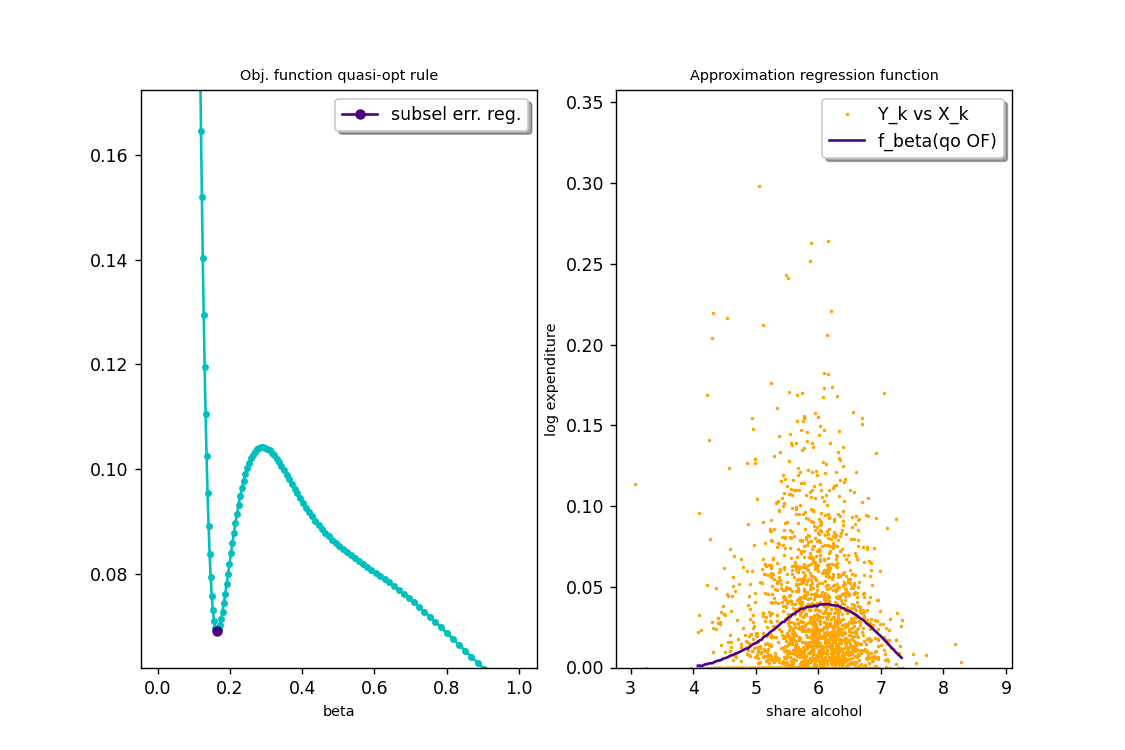

m = 100, n= 100, kernel = gaussian , beta_qo_OF = 0.16562 



In [85]:

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)


fig, axes = plt.subplots(1,2)

## Quasi-optimality parameter choice rule with reg error
axes[0].plot(vec_beta[0:-1],quasi_opt_vec_beta,'c.-')
axes[0].plot(beta_quasi_opt_OF,quasi_opt_min_OF,marker = 'o',color = 'indigo',markersize= 5,label ='subsel err. reg.')
axes[0].set_xlabel('beta', fontsize='small')
axes[0].set_title('Obj. function quasi-opt rule', fontsize='small')
legend = axes[0].legend(loc='best', shadow=True, fontsize='medium')
axes[0].set_ylim([0.9*min(quasi_opt_min_HF,quasi_opt_min_OF), 2.5*max(quasi_opt_min_HF,quasi_opt_min_OF)])
# axes[0].set_xlim([-0.01, 0.1])

axes[1].plot(X_log_exp,Y_1_alcohol,'o', color = 'orange', label = 'Y_k vs X_k',markersize= 1)
axes[1].plot(x_,f_beta_quasi_opt_OF,color = 'indigo',label = 'f_beta(qo OF)')
axes[1].set_xlabel('share alcohol', fontsize='small')
axes[1].set_ylabel('log expenditure', fontsize='small')
legend = axes[1].legend(loc='best', shadow=True, fontsize='medium')
axes[1].set_xlim([0.9*min(X_log_exp), 1.1*max(X_log_exp)])
axes[1].set_ylim([0, 1.2*max(Y_1_alcohol)])
axes[1].set_title('Approximation regression function', fontsize='small')


plt.show()

print("m = %d, n= %d, kernel = %s , beta_qo_OF = %2.5f \n" %(m,n,kernel,beta_quasi_opt_OF))
# print(" beta_dd_rule 1= %2.5g, beta_less_HF = %2.5g, beta_of_HF_kill = %2.5f , beta_qo_HF  = %2.5f, beta_qo_OF = %2.5f"%(beta_obj_func, beta_less_HF,beta_of_HF_kill,beta_quasi_opt_HF,beta_quasi_opt_OF))

$\textbf{Trial Example with interactive choice of regularization parameter}$

$\textbf{a) Interactive choice of $\beta$, $n$, $m$ and convolution kernel}$

In [86]:
%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

import matplotlib.pyplot as plt
def interect_npir_by_mollif(beta_,m_x,n_w,kernel):
    
    save_output =  False
    filename = "Trial.txt"
    print_msg =  False
    [f_x_beta,x_] = regul_npir_by_mollif_single_beta(Y_1_alcohol,X_log_exp,W_log_income,m_x,n_w,beta_,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename,print_msg)
        
    ## manage Figure size
    plt.rcParams["figure.figsize"] = (7,7) # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_1_alcohol,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = 'approx reg. fct. f_beta ')
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share alcohol')
    axes.set_title('non-par. instrum. reg. with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')

    plt.xlim([0.9*min(X_log_exp) , 1.1*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_1_alcohol)])
    plt.show()
    
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.0746000,min=1e-3,max=1,step=1e-3,readout_format='.6g'),
         m_x = widgets.IntSlider(value=100,min=30,max=500,step=10),
         n_w = widgets.IntSlider(value=100,min=30,max=600,step=10),
         kernel = widgets.Dropdown(options=['gaussian', 'cauchy', 'laplace','logistic'],
                                   value='gaussian',
                                   description='Convol kernel',
                                   disabled=False,)
        )


interactive(children=(FloatSlider(value=0.0746, description='beta_', max=1.0, min=0.001, readout_format='.6g',…

<function __main__.interect_npir_by_mollif(beta_, m_x, n_w, kernel)>

$\textbf{b) Interactive choice of $\beta$ with fixed $n$, $m$ and convolution kernel}$

In [87]:
m_x = 100
n_w = 100

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

kernel = 'gaussian'
print_msg = False

[Mat_M,rhs_b,x_node] = Discretization_Gate_function(Y_1_alcohol,X_log_exp,W_log_income,m_x,n_w,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
           
h_x = x_node[1] - x_node[0]
a_x = x_node[0]
b_x = x_node[-1]

M_T     =  Mat_M.T
M_NE    =  M_T @ Mat_M
b_NE    =  M_T @ rhs_b
I_      = np.eye(m_x)

x_ = np.zeros(m_x)
for k in range(m_x):
    x_[k] = (x_node[k] + x_node[k+1])/2
        
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def interect_npir_by_mollif(beta_):
    
    C_beta = Mat_Conv_1d(m_x,h_x,beta_,kernel)
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
#     coef_x_beta = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") 
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)

#     coef_x_beta_s = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual_s    = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
#     f_x_beta_s = coef_x_beta_s
    
    f_x_beta = coef_x_beta
    f_x_beta_kill_HF = kill_high_freq_in_sign(f_x_beta,5)
    
    ## manage Figure size
    # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    plt.rcParams["figure.figsize"] = (9,6) 
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_1_alcohol,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = ' f beta',linewidth=2.5)
#     axes.plot(x_,f_x_beta_s,'g',label = ' f beta s',linewidth=1)
    axes.plot(x_,f_x_beta_kill_HF,'g',label = ' HF_killed{f_beta}',linewidth=2.5)
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share alcohol')
    axes.set_title('npir with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')
    
    plt.xlim([0.9*min(X_log_exp) , 1.2*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_1_alcohol)])
    plt.show()
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    if residual < 1e-10:
        print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E \n" % residual)
    else:
        print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.09,min=1e-4,max=1,step=1e-3,readout_format='.6g')
        )


interactive(children=(FloatSlider(value=0.09, description='beta_', max=1.0, min=0.0001, readout_format='.6g', …

<function __main__.interect_npir_by_mollif(beta_)>

# 6- Regression Share_clothing vs log_expenditure

<IPython.core.display.Javascript object>


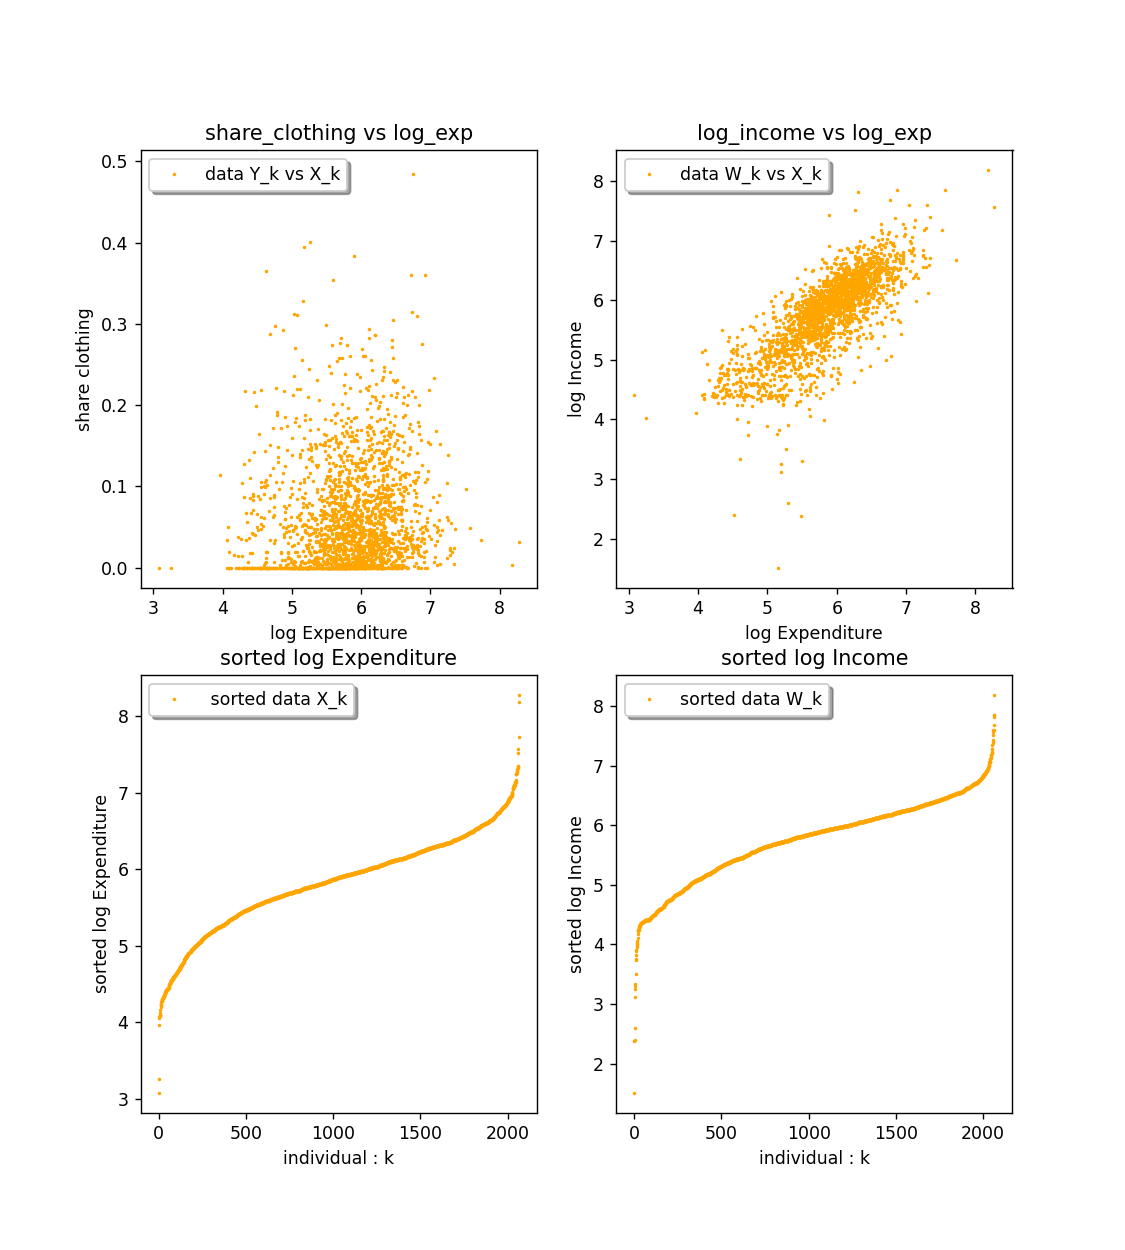

In [88]:
%matplotlib notebook
import matplotlib.pyplot as plt
## manage Figure size
plt.rcParams["figure.figsize"] = (9,10)

fig, axes = plt.subplots(2,2)

axes[0,0].plot(X_log_exp,Y_2_clothing,'o', color = 'orange', label = 'data Y_k vs X_k',markersize= 1)
axes[0,0].set_xlabel('log Expenditure')
axes[0,0].set_ylabel('share clothing')
axes[0,0].set_title('share_clothing vs log_exp')
legend = axes[0,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[0,1].plot(X_log_exp,W_log_income,'o', color = 'orange', label = 'data W_k vs X_k',markersize= 1)
axes[0,1].set_xlabel('log Expenditure')
axes[0,1].set_ylabel('log Income')
axes[0,1].set_title('log_income vs log_exp')
legend = axes[0,1].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,0].plot(np.arange(len(X_log_exp)),np.sort(X_log_exp),'o', color = 'orange', label = ' sorted data X_k',markersize= 1)
axes[1,0].set_title('sorted log Expenditure')
axes[1,0].set_xlabel('individual : k')
axes[1,0].set_ylabel('sorted log Expenditure')
legend = axes[1,0].legend(loc='upper left', shadow=True, fontsize='medium')

axes[1,1].plot(np.arange(len(W_log_income)),np.sort(W_log_income),'o', color = 'orange', label = 'sorted data W_k',markersize= 1)
axes[1,1].set_title('sorted log Income')
axes[1,1].set_xlabel('individual : k')
axes[1,1].set_ylabel('sorted log Income')
legend = axes[1,1].legend(loc='upper left', shadow=True, fontsize='medium')

plt.show()

$\textbf{With data-driven parameter selection rule}$

choice of support of X and Y accordingly to data (reducing number of zeros columns)

In [89]:
m = 100
n = 100

# ##
# kk_min_X = 1
# kk_max_X = 1

# kk_min_W = 1
# kk_max_W = 1

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5



kernel = "gaussian"
save_output =  False
filename = "Trial_data_driven_rule.txt"

[f_x_beta_obj_func,f_x_beta_less_HF,f_x_beta_of_HF_kill,x_,beta_obj_func,beta_less_HF,beta_of_HF_kill,Obj_func_vec_beta_,quant_HF_vec_beta_,Of_HF_killed_vec_beta_,vec_beta,min_obj_func_,min_quant_HF_,min_of_HF_kill]\
= npir_by_mollif_dd_par_sel_rule(Y_2_clothing,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)

print("QUASI OPT RULE \n")
[f_beta_quasi_opt_HF,f_beta_quasi_opt_OF,x_,beta_quasi_opt_HF,beta_quasi_opt_OF,quasi_opt_min_HF,quasi_opt_min_OF,quasi_opt_vec_beta] = disc_quasi_opt_rule(Y_2_clothing,X_log_exp,W_log_income,m,n,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename)   

 I - Discretization of the problem ... 
 Considered support of X = [4.06, 7.35] 
 
 Considered support of W = [3.74, 7.68] 
 
The original Matrix M has  2 zeros columns 
  whose index are  [2, 95]
 Correction of zeros column with interpolation trick ... 

 II - Regularization process ... 
 Range of regularization parameter = [0.0027 ,  1] .

 Minimization of the objective function of the data-driven rule ... 
 
 regularization parameter computed :) 
 
 Computation of the corresponding regularized solution ...
 
 The Matrix of the F.O.O.C  (dd rule) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule) successful :) 
 Residual = 1.81501E-14  

 The Matrix of the F.O.O.C  (choice Less High Freq) is non singular :) 
 
 Resolution of the F.O.O.C (choice Less High Freq) successful :) 
 Residual = 1.45034E-14  

 The Matrix of the F.O.O.C  (dd rule with HF killed) is non singular :) 
 
 Resolution of the F.O.O.C (dd rule with HF killed) successful :) 
 Residual = 1.26466E-14  

QUASI OP

<IPython.core.display.Javascript object>


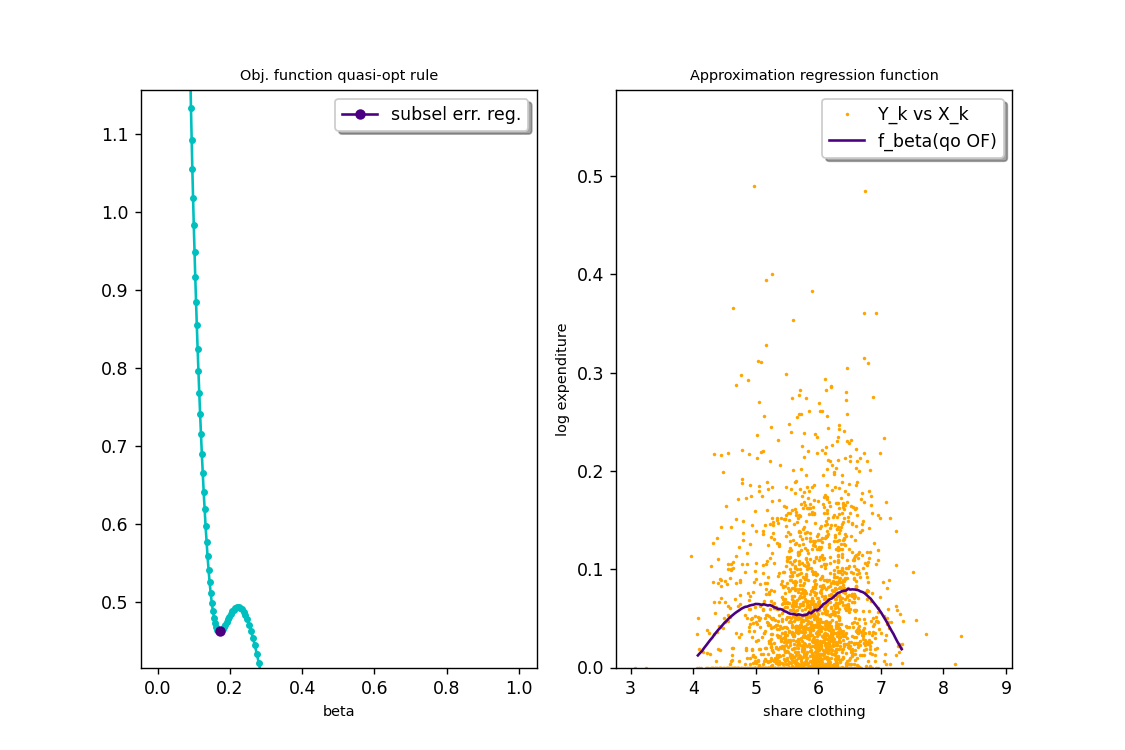

m = 100, n= 100, kernel = gaussian , beta_qo_OF = 0.17245 



In [90]:

%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


## manage Figure size
plt.rcParams["figure.figsize"] = (9,6)


fig, axes = plt.subplots(1,2)

## Quasi-optimality parameter choice rule with reg error
axes[0].plot(vec_beta[0:-1],quasi_opt_vec_beta,'c.-')
axes[0].plot(beta_quasi_opt_OF,quasi_opt_min_OF,marker = 'o',color = 'indigo',markersize= 5,label ='subsel err. reg.')
axes[0].set_xlabel('beta', fontsize='small')
axes[0].set_title('Obj. function quasi-opt rule', fontsize='small')
legend = axes[0].legend(loc='best', shadow=True, fontsize='medium')
axes[0].set_ylim([0.9*min(quasi_opt_min_HF,quasi_opt_min_OF), 2.5*max(quasi_opt_min_HF,quasi_opt_min_OF)])
# axes[0].set_xlim([-0.01, 0.1])

axes[1].plot(X_log_exp,Y_2_clothing,'o', color = 'orange', label = 'Y_k vs X_k',markersize= 1)
axes[1].plot(x_,f_beta_quasi_opt_OF,color = 'indigo',label = 'f_beta(qo OF)')
axes[1].set_xlabel('share clothing', fontsize='small')
axes[1].set_ylabel('log expenditure', fontsize='small')
legend = axes[1].legend(loc='best', shadow=True, fontsize='medium')
axes[1].set_xlim([0.9*min(X_log_exp), 1.1*max(X_log_exp)])
axes[1].set_ylim([0, 1.2*max(Y_2_clothing)])
axes[1].set_title('Approximation regression function', fontsize='small')


plt.show()

print("m = %d, n= %d, kernel = %s , beta_qo_OF = %2.5f \n" %(m,n,kernel,beta_quasi_opt_OF))
# print(" beta_dd_rule 1= %2.5g, beta_less_HF = %2.5g, beta_of_HF_kill = %2.5f , beta_qo_HF  = %2.5f, beta_qo_OF = %2.5f"%(beta_obj_func, beta_less_HF,beta_of_HF_kill,beta_quasi_opt_HF,beta_quasi_opt_OF))

$\textbf{Trial Example with interactive choice of regularization parameter}$

$\textbf{a) Interactive choice of $\beta$, $n$, $m$ and convolution kernel}$

In [91]:
%matplotlib notebook
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

import matplotlib.pyplot as plt
def interect_npir_by_mollif(beta_,m_x,n_w,kernel):
    
    save_output =  False
    filename = "Trial.txt"
    print_msg =  False
    [f_x_beta,x_] = regul_npir_by_mollif_single_beta(Y_2_clothing,X_log_exp,W_log_income,m_x,n_w,beta_,kk_min_X,kk_max_X,kk_min_W,kk_max_W,kernel,save_output,filename,print_msg)
        
    ## manage Figure size
    plt.rcParams["figure.figsize"] = (7,7) # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_2_clothing,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = 'approx reg. fct. f_beta ')
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share clothing')
    axes.set_title('non-par. instrum. reg. with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')

    plt.xlim([0.9*min(X_log_exp) , 1.1*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_2_clothing)])
    plt.show()
    
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.0746000,min=1e-3,max=1,step=1e-3,readout_format='.6g'),
         m_x = widgets.IntSlider(value=100,min=30,max=500,step=10),
         n_w = widgets.IntSlider(value=100,min=30,max=600,step=10),
         kernel = widgets.Dropdown(options=['gaussian', 'cauchy', 'laplace','logistic'],
                                   value='gaussian',
                                   description='Convol kernel',
                                   disabled=False,)
        )


interactive(children=(FloatSlider(value=0.0746, description='beta_', max=1.0, min=0.001, readout_format='.6g',…

<function __main__.interect_npir_by_mollif(beta_, m_x, n_w, kernel)>

$\textbf{b) Interactive choice of $\beta$ with fixed $n$, $m$ and convolution kernel}$

In [92]:
m_x = 100
n_w = 100

## according to plot above
kk_min_X = 4
kk_max_X = 6

kk_min_W = 10
kk_max_W =5

kernel = 'gaussian'
print_msg = False

[Mat_M,rhs_b,x_node] = Discretization_Gate_function(Y_2_clothing,X_log_exp,W_log_income,m_x,n_w,kk_min_X,kk_max_X,kk_min_W,kk_max_W,print_msg)
           
h_x = x_node[1] - x_node[0]
a_x = x_node[0]
b_x = x_node[-1]

M_T     =  Mat_M.T
M_NE    =  M_T @ Mat_M
b_NE    =  M_T @ rhs_b
I_      = np.eye(m_x)

x_ = np.zeros(m_x)
for k in range(m_x):
    x_[k] = (x_node[k] + x_node[k+1])/2
        
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

def interect_npir_by_mollif(beta_):
    
    C_beta = Mat_Conv_1d(m_x,h_x,beta_,kernel)
    MM_C_beta_NE = M_NE + np.transpose(I_ - C_beta) @ ( I_ - C_beta)
    
#     coef_x_beta = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    [coef_x_beta, residual, rank, s] = sc_la.lstsq(MM_C_beta_NE, b_NE , lapack_driver="gelsd") 
    if residual.size == 0:
        residual = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)

#     coef_x_beta_s = sc_la.solve(MM_C_beta_NE,b_NE)
#     residual_s    = norm(MM_C_beta_NE @ coef_x_beta -  b_NE)
    
#     f_x_beta_s = coef_x_beta_s
    
    f_x_beta = coef_x_beta
    f_x_beta_kill_HF = kill_high_freq_in_sign(f_x_beta,5)
    
    ## manage Figure size
    # plt.rcParams['figure.figsize'] = [13.7, 10.45]
    plt.rcParams["figure.figsize"] = (9,6) 
    
    fig, axes = plt.subplots()
    axes.plot(X_log_exp,Y_2_clothing,'o', color = 'orange' ,      label = 'data Y_k vs X_k',markersize= 2)
    axes.plot(x_,f_x_beta,'b',label = ' f beta',linewidth=2.5)
#     axes.plot(x_,f_x_beta_s,'g',label = ' f beta s',linewidth=1)
    axes.plot(x_,f_x_beta_kill_HF,'g',label = ' HF_killed{f_beta}',linewidth=2.5)
    axes.set_xlabel('log expenditure')
    axes.set_ylabel('share clothing')
    axes.set_title('npir with mollif')
    legend = axes.legend(loc='best', shadow=True, fontsize='x-large')
    
    plt.xlim([0.9*min(X_log_exp) , 1.2*max(X_log_exp) ])
    plt.ylim([0, 1.2*max(Y_2_clothing)])
    plt.show()
    print("beta = ",beta_," m_x = ",m_x ," n_w =  ", n_w, "kernel = ",kernel)
    if residual < 1e-10:
        print(" Resolution of the F.O.O.C successful :). \n Residual = %2.5E \n" % residual)
    else:
        print(" Resolution of the F.O.O.C not the good.  Residual = %2.5E \n" % residual)

    
interact(interect_npir_by_mollif,
         beta_ = widgets.FloatSlider(value=0.09,min=1e-4,max=1,step=1e-3,readout_format='.6g')
        )


interactive(children=(FloatSlider(value=0.09, description='beta_', max=1.0, min=0.0001, readout_format='.6g', …

<function __main__.interect_npir_by_mollif(beta_)>